In [6]:
# Single Neuron

inputs = [1,2,3]
weights = [0.2, 0.5, -0.6]

bias = 2

result = 0

for i in range(len(inputs)):
    result += inputs[i] * weights[i]

result += bias

result

1.4000000000000001

In [48]:
# A layer of Neurons
import numpy as np

inputs = np.array([1,2,3,4])

weights = np.array([[0.2, 0.5, -0.6, 0.1], [0.4, 0.1, -0.5, 0.6], [0.2, 0.5, -0.6, -0.3]] )
bias = [2,4,0.5]

output = np.dot(weights, inputs) + bias
output

array([ 1.8       ,  5.5       , -1.29999995])

In [ ]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
         [-1.5, 2.7, 3.5, -0.5]]

weights = [[0.2,2.1,-0.3,1.1],
         [0.5,-1.4,-1.3,2.1],
         [-1.1,1.7,0.5,-0.5]]

biases = [2,3,0]

layer1_output = np.dot(inputs, np.array(weights).T) +biases

weights2 = [[0.1,1.3,-0.5],
         [0.1,-1,3],
         [1,-1,0.3]]

biases2  = [-1, 2, -3]

print("Layer 1")
print(layer1_output)

layer2_output = np.dot(layer1_output, np.array(weights2).T) +biases2

print("Layer 2")
print(layer2_output)


In [ ]:
%pip install nnfs

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

x,y = spiral_data(samples=100, classes=3)

plt.scatter(x[:,0], x[:,1], c=y, cmap='brg')
plt.show()

## Dense Layer Class

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
    
# Create Dataset
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)

dense1.forward(X)

print(dense1.output[:5])


    


In [ ]:
# Relu Activation Function Code

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []

for i in inputs:
    output.append(max(0,i))

output

# Relu Activation Function

In [ ]:
# Creating an Activation function class
class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)

# Creating a basic dataset
X,y = spiral_data(samples=500, classes=3)

# Initializing the Layer_Dense class object
dense1 = Layer_Dense(2,3)

# Initializing the Activation_Relu class object
activation1  = Activation_Relu()

# forwarding the X value in the class
dense1.forward(X)

# passing the output from the dense layer class to the activation function
activation1.forward(dense1.output)

# getting the output which will always be greater than zero or zero
print(activation1.output[:5])

# Softmax Activation Function

In [ ]:
# Performing Exponential function 

import math

layer_outputs = [4.8, 1.21, 2.385]

# e = 2.71828182846
e = math.e
exp_values = []

for output in layer_outputs:
    exp_values.append(e** output)
    
print(exp_values)

In [ ]:
# Normalizing the values


norm_base = sum(exp_values)

norm_values = []

for value in exp_values:
    norm_values.append(value/ norm_base)
    
print("norm_base ",norm_base)
print("exp_values ", exp_values)
print("norm_values ",norm_values)

In [ ]:
import math
import numpy as np
   
layer_outputs = [4.8, 1.21, 2.385]

# here we are using the numpy's exp function and passing the values
exp_values = np.exp(layer_outputs)

# and for the normalized values dividing the exp values by the sum of exp_values
norm_values = exp_values / np.sum(exp_values)
    
print("exp_values ", exp_values)
print("norm_values ",norm_values)

In [ ]:
import numpy as np

# input 
layer_outputs = [[4.8, 1.21, 2.385],
                [8.9, -1.81, 0.2],
                [1.41, 1.051, 0.026]]

# subtracting the max of the layer_output to solve the exponential value outbursting
exp_values =  np.exp(inputs - np.max(layer_outputs, axis=1, keepdims=True))

print(exp_values)

norm_values = exp_values / np.sum(layer_outputs, axis=1, keepdims=True)


## Softmax Activation Class

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals

#.......................................................................
        
# Creating a basic dataset
X,y = spiral_data(samples=500, classes=3)

# Initializing the Layer_Dense class object
dense1 = Layer_Dense(2,3)

activation1 = Activation_Relu()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

## Categorical Crossentropy

In [ ]:
import numpy as np
import math

b = 5.2

print(np.log(b))

print(math.e ** 1.6486586255873816)


In [ ]:
import math

# creating a list of output from softmax activation function
softmax_output = [0.7, 0.1, 0.2]

# one-hot encoded vector list
target_output = [1,0,0]

# calculating the loss by multiplying the log(output) with the target output
loss = -(math.log(softmax_output[0])*target_output[0] +
         math.log(softmax_output[1])*target_output[1] +
         math.log(softmax_output[2])*target_output[2])

print(loss)

In [ ]:
import numpy as np

softmax_output = np.array([[0.7, 0.1, 0.2],
                          [0.1, 0.6, 0.4],
                          [0.02, 0.9, 0.08]])

class_targets = [0, 1 , 1]

print(-(np.log(softmax_output[range(len(softmax_output)), class_targets])))

In [ ]:
import numpy as np

softmax_ouputs = np.array([[0.7, 0.1, 0.2],
                          [0.1, 0.6, 0.4],
                          [0.02, 0.9, 0.08]])


class_targets = np.array([0,1,1])

class_targets2 = np.array([0,1,0])


# getting the max value from the softmax activation function output
predictions = np.argmax(softmax_ouputs, axis =1)

if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
    
# getting the mean of predictions and class targets
accuracy = np.mean(predictions == class_targets) 
accuracy2 = np.mean(predictions == class_targets2)

print("Accuracy ",accuracy)
print("Accuracy2 ", accuracy2)

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
        
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss
    
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log


class Accuracy:
    def get_accuracy(self, y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................
        
# Creating a basic dataset
X,y = spiral_data(samples=500, classes=3)

# Initializing the Layer_Dense class object
dense1 = Layer_Dense(2,3)

activation1 = Activation_Relu()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)


loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)
print("Loss: ", loss)

accuracy = Accuracy()
accuracy.get_accuracy(activation2.output, np.array(y))

##  Optimization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x

x = np.arange(0, 50, 0.001)
y = f(x)

plt.plot(x,y)
plt.show()

In [ ]:
def f(x):
    return 2*x**2

x = np.arange(0, 50, 0.001)
y = f(x)

plt.plot(x,y)
plt.show()

In [ ]:
def f(x):
    return 2*x**2

x = np.arange(0, 50, 0.001)
y = f(x)

plt.figure(figsize=(10,8))
plt.plot(x,y)

p2_delta = 0.0001
x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

print((x1, y1), (x2, y2))

approximate_derivative = (y2-y1) / (x2-x1)
b = y2 - approximate_derivative * x2

def approximate_tangent_line(x):
    return approximate_derivative * x + b # max + b

to_plot = [x1-0.9, x1, x1+0.9]

plt.plot(to_plot, [approximate_tangent_line(point) for point in to_plot])

print("Approximate derivarive for f(x)")

plt.show()

## Backpropagation

In [ ]:
#-----------------------Forward pass-------------------------------

x = [1.0, -2.0, 3.0]  #input values
weights = [-3.0, -1.0, 2.0]  #weights
bias = 1.0  #bias

# multiplying inputs by weights
xw0, xw1, xw2 = [val * weight for val, weight in zip(x, weights)]

# adding weighted inputs and the bias
z = sum([xw0, xw1, xw2]) + bias

# applying relu activation function
y = max(z, 0)


#------------------------Backward pass-------------------------


# the derivative from the next layer

dvalue = 1.0 # d -> derivative

drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

# Partial derivative of the multiplication of the inputs and the weights
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1

# partial derivative of the bias also
dsum_db = 1

drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db

print(drelu_dxw0,drelu_dxw1,drelu_dxw2)

drelu_dx0 = drelu_dxw0 * x[0]
drelu_dw0 = drelu_dxw0 * weights[0]

drelu_dx1 = drelu_dxw1 * x[1]
drelu_dw1 = drelu_dxw1 * weights[1]

drelu_dx2 = drelu_dxw0 * x[2]
drelu_dw2 = drelu_dxw0 * weights[2]


print(drelu_dw0, drelu_dx0, drelu_dw1, drelu_dx1, drelu_dw2, drelu_dx2)

In [ ]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2]
dw = [drelu_dw0, drelu_dw1, drelu_dw2]

db = drelu_db

print(weights,bias)

# tweaking the parametere a bit
weights[0] += -0.001 * dw[0]
weights[1] += -0.001 * dw[1]
weights[2] += -0.001 * dw[2]

bias += -0.001 * db

print(weights,bias)

In [ ]:
xw0 = x[0] * weights[0]
xw1 = x[1] * weights[1]
xw2 = x[2] * weights[2]

z = sum([xw0,xw1,xw2]) + bias

y = max(z, 0)
y

In [ ]:
import numpy as np

# The gradient from the next layer
dvalues = np.array([[1., 1., 1.]])

# Three sets of weights, for each set we have 4 weights
weights = np.array([[0.2, 0.8, -0.5, 1],[0.5, -0.91, 0.26, -0.5],[-0.26, -0.27, 0.17, 0.87]]).T

weights

dinputs = np.dot(dvalues[0], weights.T)

print(dinputs)

In [ ]:
class Layer_Dense:
    
    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.zeros((1,neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        self.inputs = inputs
        
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        # Gradient values
        self.dinputs = np.dot(dvalues, self.weights.T)
        
class Activation_ReLu:
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0



## Categorical Cross-Entropy Loss Derivatice Code

In [ ]:
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss

    
class Loss_CategoricalCrossEntropy(Loss):
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

In [ ]:
import numpy as np

np.eye(5)

In [ ]:
np.eye(5)[1]


## Softmax Activation derivative code implementation

In [54]:
import numpy as np

# sample output
softmax_outputs = [0.7, 0.1, 0.2]

# shaping it as list of samples
softmax_outputs = np.array(softmax_outputs).reshape(-1,1)

# first approach
#print(softmax_ouputs * np.eye(softmax_ouputs.shape[0])) 

# second approach
print(np.diagflat(softmax_outputs))

print(np.dot(softmax_outputs, softmax_outputs.T))

print(np.diagflat(softmax_outputs) - np.dot(softmax_outputs, softmax_outputs.T))

[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]
[[0.49 0.07 0.14]
 [0.07 0.01 0.02]
 [0.14 0.02 0.04]]
[[ 0.20999999 -0.07       -0.14      ]
 [-0.07        0.09       -0.02      ]
 [-0.14       -0.02        0.16      ]]


In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss

    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self, y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    

#.......................................................................


        
# Creating a basic dataset
X,y = spiral_data(samples=500, classes=3)

# Initializing the Layer_Dense class object
dense1 = Layer_Dense(2,3)

activation1 = Activation_Relu()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

# print("Output: ", activation2.output[:5])

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)
print("Loss: ", loss)

accuracy = Accuracy()
accuracy.get_accuracy(activation2.output, np.array(y))

Common Categorical Cross Entropy and Softmax Activation Derivative

In [ ]:
class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
    

In [ ]:
import numpy as np

y_true = np.array([[1,0,0], [0,0,1], [0,1,0]])

np.argmax(y_true, axis=1)


In [ ]:
import numpy as np
import nnfs

nnfs.init()

# creating a softmax output arrray
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                          [0.1, 0.6, 0.4],
                          [0.02, 0.9, 0.08]])
# class targets
class_targets = np.array([0,1,1])

#----------------Combined Activation and Loss--------------------------


# initializing the combined activation and loss function
softmax_loss = Activation_Softmax_Loss_CategoricalCrossEntropy()

# backward passing the softmax outputs and the targets
softmax_loss.backward(softmax_ouputs, class_targets)

# storing the gradients the dinputs
dvalues1 = softmax_loss.dinputs

#----------------Seperate Activation and Loss--------------------------

# Initializing the activation function
activation = Activation_Softmax()

# for testing purpose setting the activation output as softmax output we created
activation.output = softmax_ouputs

# initializing the loss function
loss = Loss_CategoricalCrossEntropy()

# calling the backward pass for loss function 
# passing the activation function output and class targets
loss.backward(softmax_ouputs, class_targets)

# calling the backward pass for the activation function
activation.backward(loss.dinputs)

# storing the gradients
dvalues2 = activation.dinputs

print("Gradients: combined loss and activation: ")
print(dvalues1)
print("------------------------------------------")
print("Gradients: separate loss and activation: ")
print(dvalues2)


In [ ]:
np.empty_like(1000)

# Optimizers

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss

    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0):
        self.learning_rate = learning_rate
        
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases
        

In [ ]:
# creating the dataset that has three classes
X, y = spiral_data(samples = 100, classes=3)

# creating the first layer with 2 inputs and 64 output values
dense1 = Layer_Dense(2, 64)

# initializing the activation function
activation1 = Activation_ReLu()

# creating the second layer with 64 inputs and 3 output values
# as we have 64 outputs from the previous layer dense1
dense2 = Layer_Dense(64, 3)

# initializing the loss activation function
loss_activation = Activation_Softmax_Loss_CategoricalCrossEntropy()

# initializing the optimizer SGD
optimizer = Optimizer_SGD()


# Performing the action --------------------

# forwarding the data with the dense layer 1
dense1.forward(X)

# forwarding the output from the dense layer1 with the activation function
activation1.forward(dense1.output)

# forwarding the activation1 function output with the dense layer 2
dense2.forward(activation1.output)

# generating the loss from the dense layer 2 output and the truth
loss = loss_activation.forward(dense2.output, y)

# pringing the loss value till this point
print("Loss :", loss)


predictions = np.argmax(loss_activation.output, axis=1)

if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
    
accuracy = np.mean(predictions == y)

print("Accuracy: ", accuracy)


#---------------------Backpropagation----------------------

# backward passing from the loss activation function
loss_activation.backward(loss_activation.output, y)

# backward passing from dense2 layer with the gradient
# from loss activation function
dense2.backward(loss_activation.dinputs)

# backward passing the activation 1 function with the gradient from dense layer 2
activation1.backward(dense2.dinputs)

# backward passing the gradient from activation1 with the dense layer 1
dense1.backward(activation1.dinputs)

# updating the weights and biases of dense layer 1 and 2
optimizer.update_params(dense1)
optimizer.update_params(dense2)

In [ ]:
# creating the dataset that has three classes
X, y = spiral_data(samples = 100, classes=3)

# creating the first layer with 2 inputs and 64 output values
dense1 = Layer_Dense(2, 64)

# initializing the activation function
activation1 = Activation_ReLu()

# creating the second layer with 64 inputs and 3 output values
# as we have 64 outputs from the previous layer dense1
dense2 = Layer_Dense(64, 3)

# initializing the loss activation function
loss_activation = Activation_Softmax_Loss_CategoricalCrossEntropy()

# initializing the optimizer SGD
optimizer = Optimizer_SGD()

for epoch in range(10001):
    
    dense1.forward(X)
    
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}')
    
    
    loss_activation.backward(loss_activation.output, y)

    # backward passing from dense2 layer with the gradient
    # from loss activation function
    dense2.backward(loss_activation.dinputs)

    # backward passing the activation 1 function with the gradient from dense layer 2
    activation1.backward(dense2.dinputs)

    # backward passing the gradient from activation1 with the dense layer 1
    dense1.backward(activation1.dinputs)

    # updating the weights and biases of dense layer 1 and 2
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

# Learning Rate Decay

In [ ]:
starting_learning_rate = 1.
learning_rate_decay = 0.1
step =20

learning_rate = starting_learning_rate * (1. / (1 + learning_rate_decay * step))

print(learning_rate)

In [ ]:
starting_learning_rate = 1.
learning_rate_decay = 0.1

for step in range(20):
    learning_rate = starting_learning_rate * (1. / (1 + learning_rate_decay * step))
    print(learning_rate)

In [ ]:
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases
        
    def post_update_parameters(self):
        self.iterations +=1

# Training the Model with updated Optimizer added with Learning Decay

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss

    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases
        
    def post_update_parameters(self):
        self.iterations +=1
        

In [ ]:
# creating the dataset that has three classes
X, y = spiral_data(samples = 100, classes=3)

# creating the first layer with 2 inputs and 64 output values
dense1 = Layer_Dense(2, 64)

# initializing the activation function
activation1 = Activation_Relu()

# creating the second layer with 64 inputs and 3 output values
# as we have 64 outputs from the previous layer dense1
dense2 = Layer_Dense(64, 3)

# initializing the loss activation function
loss_activation = Activation_Softmax_Loss_CategoricalCrossEntropy()

# initializing the optimizer SGD
optimizer = Optimizer_SGD(decay = 1e-3)

for epoch in range(10001):
    
    dense1.forward(X)
    
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}', f'lr: {optimizer.current_learning_rate} ')
    
    
    loss_activation.backward(loss_activation.output, y)

    # backward passing from dense2 layer with the gradient
    # from loss activation function
    dense2.backward(loss_activation.dinputs)

    # backward passing the activation 1 function with the gradient from dense layer 2
    activation1.backward(dense2.dinputs)

    # backward passing the gradient from activation1 with the dense layer 1
    dense1.backward(activation1.dinputs)

    # updating the weights and biases of dense layer 1 and 2
    optimizer.pre_update_parameters()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_parameters()

# Stochastic Gradient Descent

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss

    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------
    
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1
        

In [ ]:
# creating the dataset that has three classes
X, y = spiral_data(samples = 100, classes=3)

# creating the first layer with 2 inputs and 64 output values
dense1 = Layer_Dense(2, 64)

# initializing the activation function
activation1 = Activation_Relu()

# creating the second layer with 64 inputs and 3 output values
# as we have 64 outputs from the previous layer dense1
dense2 = Layer_Dense(64, 3)

# initializing the loss activation function
loss_activation = Activation_Softmax_Loss_CategoricalCrossEntropy()

# initializing the optimizer SGD
optimizer = Optimizer_SGD(decay = 1e-3, momentum=0.5)

for epoch in range(10001):
    
    dense1.forward(X)
    
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}', f'lr: {optimizer.current_learning_rate} ')
    
    
    loss_activation.backward(loss_activation.output, y)

    # backward passing from dense2 layer with the gradient
    # from loss activation function
    dense2.backward(loss_activation.dinputs)

    # backward passing the activation 1 function with the gradient from dense layer 2
    activation1.backward(dense2.dinputs)

    # backward passing the gradient from activation1 with the dense layer 1
    dense1.backward(activation1.dinputs)

    # updating the weights and biases of dense layer 1 and 2
    optimizer.pre_update_parameters()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_parameters()

# AdaGrad

In [ ]:
%pip install nnfs

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss

    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------
    
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
        

In [9]:
# creating the dataset that has three classes
X, y = spiral_data(samples = 100, classes=3)

# creating the first layer with 2 inputs and 64 output values
dense1 = Layer_Dense(2, 64)

# initializing the activation function
activation1 = Activation_Relu()

# creating the second layer with 64 inputs and 3 output values
# as we have 64 outputs from the previous layer dense1
dense2 = Layer_Dense(64, 3)

# initializing the loss activation function
loss_activation = Activation_Softmax_Loss_CategoricalCrossEntropy()

# initializing the optimizer SGD
optimizer = Optimizer_AdaGrad(decay = 1e-3)

for epoch in range(10001):
    
    dense1.forward(X)
    
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}', f'lr: {optimizer.current_learning_rate} ')
    
    
    loss_activation.backward(loss_activation.output, y)

    # backward passing from dense2 layer with the gradient
    # from loss activation function
    dense2.backward(loss_activation.dinputs)

    # backward passing the activation 1 function with the gradient from dense layer 2
    activation1.backward(dense2.dinputs)

    # backward passing the gradient from activation1 with the dense layer 1
    dense1.backward(activation1.dinputs)

    # updating the weights and biases of dense layer 1 and 2
    optimizer.pre_update_parameters()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_parameters()

Epoch: 0, acc: 0.36, loss: 1.098594307899475 lr: 1.0 
Epoch: 100, acc: 0.49, loss: 1.0180515050888062 lr: 0.9099181073703367 
Epoch: 200, acc: 0.5733333333333334, loss: 0.9450024366378784 lr: 0.8340283569641367 
Epoch: 300, acc: 0.6166666666666667, loss: 0.8792305588722229 lr: 0.7698229407236336 
Epoch: 400, acc: 0.6266666666666667, loss: 0.8319222927093506 lr: 0.7147962830593281 
Epoch: 500, acc: 0.6266666666666667, loss: 0.8031525611877441 lr: 0.66711140760507 
Epoch: 600, acc: 0.6366666666666667, loss: 0.7787525653839111 lr: 0.6253908692933083 
Epoch: 700, acc: 0.63, loss: 0.762219250202179 lr: 0.5885815185403178 
Epoch: 800, acc: 0.6233333333333333, loss: 0.7464234232902527 lr: 0.5558643690939411 
Epoch: 900, acc: 0.6433333333333333, loss: 0.7227268218994141 lr: 0.526592943654555 
Epoch: 1000, acc: 0.6633333333333333, loss: 0.7044738531112671 lr: 0.5002501250625312 
Epoch: 1100, acc: 0.6633333333333333, loss: 0.6910290718078613 lr: 0.4764173415912339 
Epoch: 1200, acc: 0.6733333333

# Adam Optimizer

In [10]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss

    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------
    
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
        

In [11]:
# creating the dataset that has three classes
X, y = spiral_data(samples = 100, classes=3)

# creating the first layer with 2 inputs and 64 output values
dense1 = Layer_Dense(2, 64)

# initializing the activation function
activation1 = Activation_Relu()

# creating the second layer with 64 inputs and 3 output values
# as we have 64 outputs from the previous layer dense1
dense2 = Layer_Dense(64, 3)

# initializing the loss activation function
loss_activation = Activation_Softmax_Loss_CategoricalCrossEntropy()

# initializing the optimizer SGD
optimizer = Optimizer_Adam(learning_rate=0.02, decay = 1e-3)

for epoch in range(10001):
    
    dense1.forward(X)
    
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}', f'lr: {optimizer.current_learning_rate} ')
    
    
    loss_activation.backward(loss_activation.output, y)

    # backward passing from dense2 layer with the gradient
    # from loss activation function
    dense2.backward(loss_activation.dinputs)

    # backward passing the activation 1 function with the gradient from dense layer 2
    activation1.backward(dense2.dinputs)

    # backward passing the gradient from activation1 with the dense layer 1
    dense1.backward(activation1.dinputs)

    # updating the weights and biases of dense layer 1 and 2
    optimizer.pre_update_parameters()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_parameters()

Epoch: 0, acc: 0.36, loss: 1.098594307899475 lr: 0.02 
Epoch: 100, acc: 0.6566666666666666, loss: 0.7913389801979065 lr: 0.018198362147406735 
Epoch: 200, acc: 0.78, loss: 0.5927379131317139 lr: 0.016680567139282735 
Epoch: 300, acc: 0.8266666666666667, loss: 0.495195209980011 lr: 0.015396458814472672 
Epoch: 400, acc: 0.85, loss: 0.4285662770271301 lr: 0.014295925661186561 
Epoch: 500, acc: 0.8733333333333333, loss: 0.3799552023410797 lr: 0.0133422281521014 
Epoch: 600, acc: 0.88, loss: 0.34610792994499207 lr: 0.012507817385866166 
Epoch: 700, acc: 0.8866666666666667, loss: 0.32180795073509216 lr: 0.011771630370806356 
Epoch: 800, acc: 0.89, loss: 0.3031814992427826 lr: 0.011117287381878822 
Epoch: 900, acc: 0.9033333333333333, loss: 0.28818339109420776 lr: 0.010531858873091101 
Epoch: 1000, acc: 0.91, loss: 0.26673629879951477 lr: 0.010005002501250623 
Epoch: 1100, acc: 0.9066666666666666, loss: 0.2537030577659607 lr: 0.009528346831824679 
Epoch: 1200, acc: 0.9133333333333333, loss: 

Epoch: 9700, acc: 0.9733333333333334, loss: 0.08293992280960083 lr: 0.001869333582577811 
Epoch: 9800, acc: 0.9733333333333334, loss: 0.08239053934812546 lr: 0.0018520233354940275 
Epoch: 9900, acc: 0.9733333333333334, loss: 0.08192701637744904 lr: 0.0018350307367648406 
Epoch: 10000, acc: 0.9733333333333334, loss: 0.08146724849939346 lr: 0.0018183471224656785 


# Testing the Model

In [12]:
X_test, y_test = spiral_data(samples=100, classes=3)

dense1.forward(X_test)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)

if len(y_test.shape)==2:
    y_test = np.argmax(y_test, axis=1)
    
accuracy = np.mean(predictions == y_test)

print(f"validation, acc: {accuracy}, loss: {loss}")

validation, acc: 0.8, loss: 0.9266406297683716


# L1 and L2 Regularization


In [13]:
l1w = lambda_l1w * sum(abs(weights))
l1b = lambda_l1b * sum(abs(biases))

l2w = lambda_l2w * sum(weights**2)
l2b = lambda_l2b * sum(biases**2)

NameError: name 'lambda_l1w' is not defined

In [ ]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                bias_regularizer_l1=0,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
        self.weight_regularizer_l1= weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1
        
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        if self.weight_regularizer_l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dl1
            
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
            
        if self.bias_regularizer_l1 >0:
            dl1 = np.ones_like(self.biases)
            dl1[self.biases < 0] = -1
            self.biases += self.bias_regularizer_l1 * dl1
            
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def regularization_loss(self, layer):
        
        regularization_loss = 0
        
        #------------------L1 Regularization------------------------

        
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(abs(layer.weights))
            
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(abs(layer.biases))
        
        #------------------L2 Regularization------------------------
        
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
            
        if layer.bias_regularizer_l2 > 0 :
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
            
        return regularization_loss
    
        
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss
    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------
    
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
        

In [ ]:
# creating the dataset that has three classes
X, y = spiral_data(samples = 100, classes=3)

# creating the first layer with 2 inputs and 64 output values
dense1 = Layer_Dense(2, 64, weight_regularizer_l1=5e-4, weight_regularizer_l2=5e-4)

# initializing the activation function
activation1 = Activation_Relu()

# creating the second layer with 64 inputs and 3 output values
# as we have 64 outputs from the previous layer dense1
dense2 = Layer_Dense(64, 3)

# initializing the loss activation function
loss_activation = Activation_Softmax_Loss_CategoricalCrossEntropy()

# initializing the optimizer SGD
optimizer = Optimizer_Adam(learning_rate=0.02, decay = 1e-3)

for epoch in range(10001):
    
    dense1.forward(X)
    
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    
    
    data_loss = loss_activation.forward(dense2.output, y)
    
    regularization_loss = loss_activation.loss.regularization_loss(dense1) +loss_activation.loss.regularization_loss(dense2)
    
    loss = data_loss + regularization_loss
    
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}', f'lr: {optimizer.current_learning_rate} ')
    
    
    loss_activation.backward(loss_activation.output, y)

    # backward passing from dense2 layer with the gradient
    # from loss activation function
    dense2.backward(loss_activation.dinputs)

    # backward passing the activation 1 function with the gradient from dense layer 2
    activation1.backward(dense2.dinputs)

    # backward passing the gradient from activation1 with the dense layer 1
    dense1.backward(activation1.dinputs)

    # updating the weights and biases of dense layer 1 and 2
    optimizer.pre_update_parameters()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_parameters()

In [ ]:
X_test, y_test = spiral_data(samples=100, classes=3)

dense1.forward(X_test)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)

if len(y_test.shape)==2:
    y_test = np.argmax(y_test, axis=1)
    
accuracy = np.mean(predictions == y_test)

print(f"validation, acc: {accuracy}, loss: {loss}")

## Dropout

In [ ]:
import random

droput_rate = 0.5

example_output = [0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73]

while True:
    index = random.randint(0, len(example_output) -1)
    example_output[index] = 0
    
    dropped_out = 0
    for value in example_output:
        if value == 0:
            dropped_out +=1
            
    if dropped_out / len(example_output) >= droput_rate:
        break
        
print(example_output)

In [ ]:
np.random.binomial(2, 0.5, size=10)

In [ ]:
droput_rate = 0.5

example_output = np.array([0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73])
example_output *= np.random.binomial(1, 1-droput_rate, example_output.shape) / (1 - droput_rate)

example_output

In [ ]:
droput_rate = 0.5

example_output = np.array([0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73])

print("Initial sum", sum(example_output))

sums = []

for i in range(100001):
    example_output2 = example_output * np.random.binomial(1, 1-droput_rate, example_output.shape)/ (1- droput_rate)
    
    sums.append(sum(example_output2))
    
print("Mean sum", np.mean(sums))

In [21]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                bias_regularizer_l1=0,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
        self.weight_regularizer_l1= weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1
        
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        if self.weight_regularizer_l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dl1
            
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
            
        if self.bias_regularizer_l1 >0:
            dl1 = np.ones_like(self.biases)
            dl1[self.biases < 0] = -1
            self.biases += self.bias_regularizer_l1 * dl1
            
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def regularization_loss(self, layer):
        
        regularization_loss = 0
        
        #------------------L1 Regularization------------------------

        
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(abs(layer.weights))
            
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(abs(layer.biases))
        
        #------------------L2 Regularization------------------------
        
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
            
        if layer.bias_regularizer_l2 > 0 :
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
            
        return regularization_loss
    
        
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss
    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------
    
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
        
        
        
class Layer_Dropout:
    
    def __init__(self, rate):
        self.rate = 1- rate
        
        
    def forward(self, inputs):
        self.intputs = inputs
        
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        
        self.output = inputs * self.binary_mask
        
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask
    

In [22]:
# creating the dataset that has three classes
X, y = spiral_data(samples = 100, classes=3)

# creating the first layer with 2 inputs and 64 output values
dense1 = Layer_Dense(2, 64, weight_regularizer_l1=5e-4, weight_regularizer_l2=5e-4)

# initializing the activation function
activation1 = Activation_Relu()

# adding a dropout layer
dropout1 = Layer_Dropout(0.2)

# creating the second layer with 64 inputs and 3 output values
# as we have 64 outputs from the previous layer dense1
dense2 = Layer_Dense(64, 3)

# initializing the loss activation function
loss_activation = Activation_Softmax_Loss_CategoricalCrossEntropy()

# initializing the optimizer SGD
optimizer = Optimizer_Adam(learning_rate=0.02, decay = 1e-3)

for epoch in range(10001):
    
    dense1.forward(X)
    
    activation1.forward(dense1.output)
    
    dropout1.forward(activation1.output)
    
    dense2.forward(dropout1.output)
        
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}', f'lr: {optimizer.current_learning_rate} ')
    
    
    loss_activation.backward(loss_activation.output, y)

    # backward passing from dense2 layer with the gradient
    # from loss activation function
    dense2.backward(loss_activation.dinputs)
    
    # backwardpassing the dropout layer
    dropout1.backward(dense2.dinputs)
    
    # backward passing the activation 1 function with the gradient from dense layer 2
    activation1.backward(dropout1.dinputs)

    # backward passing the gradient from activation1 with the dense layer 1
    dense1.backward(activation1.dinputs)

    # updating the weights and biases of dense layer 1 and 2
    optimizer.pre_update_parameters()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_parameters()

Epoch: 0, acc: 0.38, loss: 1.0985890626907349 lr: 0.02 
Epoch: 100, acc: 0.39, loss: 1.0544819831848145 lr: 0.018198362147406735 
Epoch: 200, acc: 0.43333333333333335, loss: 1.0319746732711792 lr: 0.016680567139282735 
Epoch: 300, acc: 0.44333333333333336, loss: 0.9989341497421265 lr: 0.015396458814472672 
Epoch: 400, acc: 0.44, loss: 1.0134342908859253 lr: 0.014295925661186561 
Epoch: 500, acc: 0.47, loss: 0.9917550683021545 lr: 0.0133422281521014 
Epoch: 600, acc: 0.43, loss: 1.0112937688827515 lr: 0.012507817385866166 
Epoch: 700, acc: 0.4266666666666667, loss: 0.9907911419868469 lr: 0.011771630370806356 
Epoch: 800, acc: 0.45666666666666667, loss: 0.9738128781318665 lr: 0.011117287381878822 
Epoch: 900, acc: 0.4766666666666667, loss: 0.9676095843315125 lr: 0.010531858873091101 
Epoch: 1000, acc: 0.4633333333333333, loss: 0.9677438139915466 lr: 0.010005002501250623 
Epoch: 1100, acc: 0.44666666666666666, loss: 0.9753645658493042 lr: 0.009528346831824679 
Epoch: 1200, acc: 0.39333333

Epoch: 9700, acc: 0.5566666666666666, loss: 0.9112416505813599 lr: 0.001869333582577811 
Epoch: 9800, acc: 0.49, loss: 0.9573771357536316 lr: 0.0018520233354940275 
Epoch: 9900, acc: 0.5333333333333333, loss: 0.9452655911445618 lr: 0.0018350307367648406 
Epoch: 10000, acc: 0.5166666666666667, loss: 0.9295267462730408 lr: 0.0018183471224656785 


In [ ]:
X_test, y_test = spiral_data(samples=100, classes=3)

dense1.forward(X_test)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)

if len(y_test.shape)==2:
    y_test = np.argmax(y_test, axis=1)
    
accuracy = np.mean(predictions == y_test)

print(f"validation, acc: {accuracy}, loss: {loss}")

# Binary Logistic Regression

In [6]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                bias_regularizer_l1=0,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
        self.weight_regularizer_l1= weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1
        
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        if self.weight_regularizer_l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dl1
            
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
            
        if self.bias_regularizer_l1 >0:
            dl1 = np.ones_like(self.biases)
            dl1[self.biases < 0] = -1
            self.biases += self.bias_regularizer_l1 * dl1
            
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Loss:
    
    def regularization_loss(self, layer):
        
        regularization_loss = 0
        
        #------------------L1 Regularization------------------------

        
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(abs(layer.weights))
            
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(abs(layer.biases))
        
        #------------------L2 Regularization------------------------
        
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
            
        if layer.bias_regularizer_l2 > 0 :
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
            
        return regularization_loss
    
        
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss
    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------
    
class Activation_Sigmoid:
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))
        
    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output
        

class Loss_BinaryCrossentropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1-y_true) * np.log(1- y_pred_clipped))
        
        sample_losses = np.mean(sample_losses, axis = -1)
        
        return sample_losses
    
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)
        
        self.dinputs = -(y_true / clipped_dvalues - (1-y_true) / (1-clipped_dvalues))/ outputs
        
        self.dinputs = self.dinputs / samples

#---------------------------------------------------------------------

        
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
        
        
        
class Layer_Dropout:
    
    def __init__(self, rate):
        self.rate = 1- rate
        
        
    def forward(self, inputs):
        self.intputs = inputs
        
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        
        self.output = inputs * self.binary_mask
        
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask
    

       

In [8]:
X,y = spiral_data(samples=100, classes=2)

y = y.reshape(-1, 1)

dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)

activation1 = Activation_Relu()

dense2 = Layer_Dense(64, 1)

activation2 = Activation_Sigmoid()

loss_function = Loss_BinaryCrossentropy()


optimizer = Optimizer_Adam(decay=5e-7)

for epoch in range(10001):
    
    # performing forward pass in the dense layer 1 with the data X
    dense1.forward(X)
    
    # performing forward pass in the activation1 with the output from dense layer1 
    activation1.forward(dense1.output)
    
    # performing forward pass in dense layer 2 with output from activation1
    dense2.forward(activation1.output)
    
    # performing forward pass in activation2 with output from dense2
    activation2.forward(dense2.output)
    
    # calculate the loss
    data_loss = loss_function.calculate(activation2.output, y)
    
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    
    loss = data_loss + regularization_loss
    
    predictions = (activation2.output > 0.5) * 1
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f"data_loss: {regularization_loss} " + f'loss: {loss} ', f'lr: {optimizer.current_learning_rate} ')
    
    #----------------------Backwardpass-------------------------------------
    
    loss_function.backward(activation2.output, y)
    
    activation2.backward(loss_function.dinputs)
    
    dense2.backward(activation2.dinputs)
    
    activation1.backward(dense2.dinputs)
    
    dense1.backward(activation1.dinputs)
    
    # updating weights and biases
    
    optimizer.pre_update_parameters()
    
    optimizer.update_params(dense1)
    
    optimizer.update_params(dense2)
    
    optimizer.post_update_parameters()
    

Epoch: 0, acc: 0.555, data_loss: 6.154515780508518e-06 loss: 0.6931260380530729  lr: 0.001 
Epoch: 100, acc: 0.59, data_loss: 0.0008019400089979171 loss: 0.6718646479099989  lr: 0.0009999505024501287 
Epoch: 200, acc: 0.6, data_loss: 0.001079534888267517 loss: 0.6683897131681442  lr: 0.0009999005098992651 
Epoch: 300, acc: 0.605, data_loss: 0.0013125455379486084 loss: 0.6652172720432281  lr: 0.000999850522346909 
Epoch: 400, acc: 0.605, data_loss: 0.0019169971942901611 loss: 0.6607432887554169  lr: 0.0009998005397923115 
Epoch: 500, acc: 0.625, data_loss: 0.002754528522491455 loss: 0.6559043717384339  lr: 0.0009997505622347225 
Epoch: 600, acc: 0.64, data_loss: 0.003877665638923645 loss: 0.6499506493806839  lr: 0.0009997005896733929 
Epoch: 700, acc: 0.62, data_loss: 0.004973494708538055 loss: 0.6439607974886894  lr: 0.0009996506221075735 
Epoch: 800, acc: 0.64, data_loss: 0.0061616690754890445 loss: 0.636773207962513  lr: 0.000999600659536515 
Epoch: 900, acc: 0.66, data_loss: 0.00779

Epoch: 7800, acc: 0.945, data_loss: 0.07229034423828125 loss: 0.2451041918992996  lr: 0.0009961156470343895 
Epoch: 7900, acc: 0.945, data_loss: 0.07195491886138916 loss: 0.2437125722169876  lr: 0.0009960660371861334 
Epoch: 8000, acc: 0.945, data_loss: 0.07161364364624023 loss: 0.24235937404632568  lr: 0.0009960164322790998 
Epoch: 8100, acc: 0.945, data_loss: 0.07127527618408204 loss: 0.2410322847366333  lr: 0.0009959668323125503 
Epoch: 8200, acc: 0.945, data_loss: 0.07093473052978516 loss: 0.23972916877269745  lr: 0.000995917237285747 
Epoch: 8300, acc: 0.945, data_loss: 0.0705975399017334 loss: 0.23843735015392303  lr: 0.000995867647197952 
Epoch: 8400, acc: 0.945, data_loss: 0.07026161003112794 loss: 0.23716826486587525  lr: 0.0009958180620484277 
Epoch: 8500, acc: 0.945, data_loss: 0.0699356689453125 loss: 0.23591947996616364  lr: 0.0009957684818364362 
Epoch: 8600, acc: 0.945, data_loss: 0.06963124370574951 loss: 0.2346979776620865  lr: 0.0009957189065612402 
Epoch: 8700, acc: 

# Validating the Model

In [9]:
X_test, y_test = spiral_data(samples=100, classes=2)

y_test = y_test.reshape(-1,1)

dense1.forward(X_test)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

activation2.forward(dense2.output)

loss = loss_function.calculate(activation2.output, y_test)

predictions = (activation2.output > 0.5) * 1
accuracy = np.mean(predictions == y_test)

print(f"validation, acc: {accuracy}, loss: {loss}")

validation, acc: 0.895, loss: 0.2775419354438782


# Regression

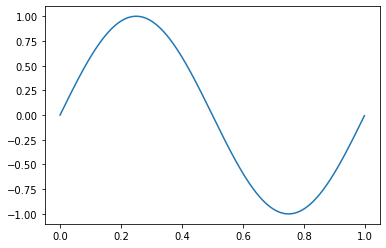

In [10]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import sine_data

nnfs.init()

X,y = sine_data()

plt.plot(X,y)
plt.show()

# Linear Activation Function

In [11]:
class Activation_Linear:
    
    # forward pass
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs
        
    # backward pass
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        

# MSE & MAE

In [6]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from nnfs.datasets import sine_data

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                bias_regularizer_l1=0,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
        
        #initializing random weights in range 
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
        self.weight_regularizer_l1= weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1
        
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # getting the output with (mx +b)
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        if self.weight_regularizer_l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dl1
            
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
            
        if self.bias_regularizer_l1 >0:
            dl1 = np.ones_like(self.biases)
            dl1[self.biases < 0] = -1
            self.biases += self.bias_regularizer_l1 * dl1
            
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
#---------------------------------------------------------------------
                
class Activation_Linear:
    
    # forward pass
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs
        
    # backward pass
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        
#---------------------------------------------------------------------
                
class Loss:
    
    def regularization_loss(self, layer):
        
        regularization_loss = 0
        
        #------------------L1 Regularization------------------------

        
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(abs(layer.weights))
            
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(abs(layer.biases))
        
        #------------------L2 Regularization------------------------
        
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
            
        if layer.bias_regularizer_l2 > 0 :
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
            
        return regularization_loss
    
        
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss
    
#---------------------------------------------------------------------
    
class Loss_MeanSquaredError(Loss):
    
    # forward pass
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
        
        return sample_losses
    
    # backward pass
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        # gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples

#---------------------------------------------------------------------
        
class Loss_MeanAbsoluteError(Loss):
    
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)
        
        return sample_losses
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        self.dinputs = np.sign(y_true - dvalues)/ outputs
        
        self.dinputs = self.dinputs / samples
         
#---------------------------------------------------------------------

class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def get_accuracy(self,y_pred, y_true):
        
        predictions = np.argmax(y_pred, axis=1)
                
        if len(y_true.shape) == 2:
            actual = np.argmax(y_true, axis=1)
        else:
            actual = np.argmax(y_true)
        
        accuracy = np.mean(predictions == y)
        
        print("accuracy : ", accuracy)

    
        
class Accuracy_Categorical(Accuracy):
    
    def __init__(self, y):
        pass
    
    def compare(self, predictions, y):
        if len(y.shape) == 2:
            y = np.argmax(y, axis=1)
            
        return predictions == y

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def __init__(self):
        
        # initializing the activation function
        self.activation = Activation_Softmax()
        
        # initializing the loss function
        self.loss = Loss_CategoricalCrossEntropy()
    
    # forward pass method, takes the input from 
    # the dense layer and the actual value
    def forward(self, inputs, y_true):
        
        # forward passing the inputs in the activation function
        self.activation.forward(inputs)
        
        # getting the output from the activation function
        self.output = self.activation.output
        
        # calculating loss with the activation function output and actual value
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        # checking if the values are one-hot-encoded
        if len(y_true.shape) ==2:
            y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------
    
class Activation_Sigmoid:
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))
        
    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output

#---------------------------------------------------------------------

class Loss_BinaryCrossentropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1-y_true) * np.log(1- y_pred_clipped))
        
        sample_losses = np.mean(sample_losses, axis = -1)
        
        return sample_losses
    
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)
        
        self.dinputs = -(y_true / clipped_dvalues - (1-y_true) / (1-clipped_dvalues))/ outputs
        
        self.dinputs = self.dinputs / samples

#---------------------------------------------------------------------

        
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
        
        
        
class Layer_Dropout:
    
    def __init__(self, rate):
        self.rate = 1- rate
        
        
    def forward(self, inputs):
        self.intputs = inputs
        
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        
        self.output = inputs * self.binary_mask
        
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask
    

       

In [15]:
X, y = sine_data()

dense1 = Layer_Dense(1, 64)

activation1 = Activation_Relu()

dense2 = Layer_Dense(64, 64)

activation2 = Activation_Relu()

dense3 = Layer_Dense(64, 1)

activation3 = Activation_Linear()

loss_function = Loss_MeanSquaredError()

optimizer = Optimizer_Adam(learning_rate=0.005, decay=1e-3)

accuracy_precision = np.std(y) / 250


for epoch in range(10001):
    
    # Forward pass
    
    # forwarding input to the dense1 layer
    dense1.forward(X)
    
    # forwarding the dense1 layer output to the activation1 function
    activation1.forward(dense1.output)
    
    # forwarding the activation1 output to the dense2 layer
    dense2.forward(activation1.output)
    
    # forwarding the dense2 output to the activation2 funciton
    activation2.forward(dense2.output)
    
    # forwarding the activation2 output to the dense3 layer
    dense3.forward(activation2.output)
    
    # forwarding the dense3 layer output to the activation3 function
    activation3.forward(dense3.output)
    
    # getting the data loss
    data_loss = loss_function.calculate(activation3.output, y)
    
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2) + loss_function.regularization_loss(dense3)
    
    loss = data_loss + regularization_loss
    
    predictions = activation3.output
    
    accuracy = np.mean(np.absolute(predictions - y) < accuracy_precision)
    
    if not epoch % 100:
        print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}', f'lr: {optimizer.current_learning_rate} ')
    
    # Backward Pass
    
    # getting the gradient from the loss function
    loss_function.backward(activation3.output, y)
    
    # passing the gradients from loss function to the activation3 backward function
    activation3.backward(loss_function.dinputs)
    
    # passing the activation3 gradient to the dense3 backward function
    dense3.backward(activation3.dinputs)
    
    # passing the gradient from the dense3 layer to from activation2 function
    activation2.backward(dense3.dinputs)
    
    # passing the gradient of activation2 function and generating the gradient from dense2 layer
    dense2.backward(activation2.dinputs)
    
    # passing the gradient of dense2 layer to the activation1 function and generating the gradient 
    activation1.backward(dense2.dinputs)
    
    # passing the gradient from activation1 and getting gradient from dense1 layer
    dense1.backward(activation1.dinputs)
    
    
    # Update weights and biases with optimizer
    optimizer.pre_update_parameters()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_parameters()
    

Epoch: 0, acc: 0.003, loss: 0.49692495421339256 lr: 0.005 
Epoch: 100, acc: 0.008, loss: 0.05490867255256923 lr: 0.004549590536851684 
Epoch: 200, acc: 0.368, loss: 0.0013410961386431449 lr: 0.004170141784820684 
Epoch: 300, acc: 0.561, loss: 0.0002489867241516661 lr: 0.003849114703618168 
Epoch: 400, acc: 0.022, loss: 0.00025897337474862494 lr: 0.0035739814152966403 
Epoch: 500, acc: 0.767, loss: 4.882750568873712e-05 lr: 0.00333555703802535 
Epoch: 600, acc: 0.036, loss: 0.00012482269734581265 lr: 0.0031269543464665416 
Epoch: 700, acc: 0.817, loss: 1.946893968806166e-05 lr: 0.002942907592701589 
Epoch: 800, acc: 0.831, loss: 1.3297329875599596e-05 lr: 0.0027793218454697055 
Epoch: 900, acc: 0.047, loss: 8.137744639664829e-05 lr: 0.0026329647182727752 
Epoch: 1000, acc: 0.852, loss: 7.709966585565008e-06 lr: 0.002501250625312656 
Epoch: 1100, acc: 0.863, loss: 5.989764906374923e-06 lr: 0.0023820867079561697 
Epoch: 1200, acc: 0.86, loss: 6.028861971693765e-06 lr: 0.002273760800363802

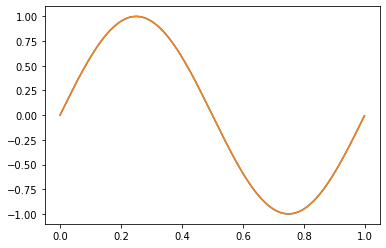

In [16]:
import matplotlib.pyplot as plt

X_test, y_test = sine_data()

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
dense3.forward(activation2.output)
activation3.forward(dense3.output)

plt.plot(X_test, y_test)
plt.plot(X_test, activation3.output)
plt.show()

# Model Object Creation

In [28]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from nnfs.datasets import sine_data

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                bias_regularizer_l1=0,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
        
        #initializing random weights in range 
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
        self.weight_regularizer_l1= weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1
        
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # getting the output with (mx +b)
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        if self.weight_regularizer_l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dl1
            
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
            
        if self.bias_regularizer_l1 >0:
            dl1 = np.ones_like(self.biases)
            dl1[self.biases < 0] = -1
            self.biases += self.bias_regularizer_l1 * dl1
            
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs, training):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
    def predictions(self, outputs):
        return outputs
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs, training):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)
                
#---------------------------------------------------------------------
                
class Activation_Linear:
    
    # forward pass
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = inputs
        
    # backward pass
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        
    def predictions(self, outputs):
        return outputs

#---------------------------------------------------------------------
    
class Activation_Sigmoid:
    
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))
        
    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output
        
    def predictions(self, outputs):
        return (outputs > 0.5) * 1
    
#---------------------------------------------------------------------
                
class Loss:
    
    def regularization_loss(self):
        
        regularization_loss = 0
        
        #------------------L1 Regularization------------------------

        
        for layer in self.trainable_layers:
            
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(abs(layer.weights))

            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(abs(layer.biases))

            #------------------L2 Regularization------------------------

            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

            if layer.bias_regularizer_l2 > 0 :
                regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss
    
    # set / remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
        
        
    def calculate(self, output, y, *, include_regularization= False):
        
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        if not include_regularization:
            return data_loss
        
        return data_loss, self.regularization_loss()
    
#---------------------------------------------------------------------
    
class Loss_MeanSquaredError(Loss):
    
    # forward pass
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
        
        return sample_losses
    
    # backward pass
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        # gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples

#---------------------------------------------------------------------
        
class Loss_MeanAbsoluteError(Loss):
    
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)
        
        return sample_losses
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        self.dinputs = np.sign(y_true - dvalues)/ outputs
        
        self.dinputs = self.dinputs / samples
         
#---------------------------------------------------------------------

class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    def calculate(self, predictions, y):
        comparisons = self.compare(predictions, y)
        
        accuracy = np.mean(comparisons)
        
        return accuracy
    
#---------------------------------------------------------------------

class Accuracy_Regression(Accuracy):
    
    def __init__(self):
        self.precision = None
        
    def init(self, y, reinit= False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250
            
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision
        

        
class Accuracy_Categorical(Accuracy):
    
    def init(self, y):
        pass
    
    def compare(self, predictions, y):
        if len(y.shape) ==2:
            y = np.argmax(y, axis=1)
            
            
        return predictions == y
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
#         # checking if the values are one-hot-encoded
#         if len(y_true.shape) ==2:
#             y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    


#---------------------------------------------------------------------

class Loss_BinaryCrossentropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1-y_true) * np.log(1- y_pred_clipped))
        
        sample_losses = np.mean(sample_losses, axis = -1)
        
        return sample_losses
    
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)
        
        self.dinputs = -(y_true / clipped_dvalues - (1-y_true) / (1-clipped_dvalues))/ outputs
        
        self.dinputs = self.dinputs / samples

#---------------------------------------------------------------------

        
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
        
        
        
class Layer_Dropout:
    
    def __init__(self, rate):
        self.rate = 1- rate
        
        
    def forward(self, inputs, training):
        self.intputs = inputs
        
        if not training:
            self.output = inputs.copy()
            return
        
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        
        self.output = inputs * self.binary_mask
        
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask
        
class Layer_Input:
    
    # forward pass
    def forward(self, inputs, training):
        self.output = inputs
        
    

In [ ]:
class Model:
    
    def __init__(self):
        # creating a list of network objects
        self.layers = []
        self.softmax_classifier_output = None
        
    # adding layers to the model
    def add(self, layer):
        self.layers.append(layer)
        
    # set loss and optimizer
    def set(self, * , loss, optimizer, accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy = accuracy
        
    # Train the model
    def train(self, X, y, *, epochs=1, print_every=1, validation_data = None):
        
        self.accuracy.init(y)
        
        for epoch in range(1, epochs+1):
            
            output = self.forward(X, training=True)
            
            data_loss, regularization_loss = self.loss.calculate(output, y, include_regularization=True)
            
            loss = data_loss + regularization_loss
            
            predictions = self.output_layer_activation.predictions(output)
            
            accuracy = self.accuracy.calculate(predictions, y)
            
            self.backward(output, y)
            
            self.optimizer.pre_update_parameters()
            
            for layer in self.trainable_layers:
                self.optimizer.update_params(layer)
                
            self.optimizer.post_update_parameters()
            
            if not epoch % print_every:
                print(f'Epoch: {epoch}, ' + f'acc: {accuracy}, '+ f'loss: {loss}', f'lr: {self.optimizer.current_learning_rate} ')
        
        
        if validation_data is not None:
            
            X_val, y_val = validation_data
            
            output = self.forward(X_val,training= False)
            
            loss = self.loss.calculate(output, y_val)
            
            predictions = self.output_layer_activation.predictions(output)
            
            accuracy = self.accuracy.calculate(predictions, y_val)
            
            print(f"validation || acc : {accuracy} , loss : {loss}")
        

    # finalize the model
    def finalize(self):
        
        #create and set the input layer
        self.input_layer = Layer_Input()
        
        # count all objects
        layer_count = len(self.layers)
        
        # initializing a list to store trainable layers
        self.trainable_layers = []
        
        for i in range(layer_count):
            
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]
                
            elif i < layer_count -1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]
                
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]
                
            # checking if the layer has an attribute weights
            # then adding it to the trainable layers list
            if hasattr(self.layers[i], "weights"):
                self.trainable_layers.append(self.layers[i])
                
                
            self.loss.remember_trainable_layers(self.trainable_layers)
            
        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(self.loss, Loss_CategoricalCrossEntropy):
                self.softmax_classifier_output =  Activation_Softmax_Loss_CategoricalCrossEntropy()
            
                
                
    # forward method || performs forward pass
    def forward(self, X, training):
        
        # calling the forward method on the input layer with X data
        # this will ensure the next layer or technically the first layer
        # gets the data it needs from the previous layer
        self.input_layer.forward(X, training)
        
        # looping over the layers and passing the previous layer output to each layer
        for layer in self.layers:
            layer.forward(layer.prev.output, training)
            
        # returning the latest layer that is the last activation function output
        return layer.output
    
    
    # performs backward pass
    def backward(self, output, y):
        
        self.loss.backward(output, y)
        
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)

        

from nnfs.datasets import sine_data

X,y = spiral_data(samples=1000, classes=3)
X_test, y_test = spiral_data(samples=100, classes=3)

y = y.reshape(-1,1)
y_test = y_test.reshape(-1, 1)
        
model = Model()

# adding layers

model.add(Layer_Dense(2, 512, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(Activation_Relu())
model.add(Layer_Dropout(0.1))
model.add(Layer_Dense(512, 3))
model.add(Activation_Softmax())


model.set(loss=Loss_BinaryCrossentropy(),
          optimizer=Optimizer_Adam(learning_rate=0.05, decay=5e-7), accuracy = Accuracy_Categorical())

model.finalize()

model.train(X, y, epochs=10000, print_every=100, validation_data=(X_test, y_test))

Epoch: 100, acc: 0.20766666666666667, loss: 35.72122472572327 lr: 0.04999752512250644 
Epoch: 200, acc: 0.15766666666666668, loss: 35.71379767417908 lr: 0.04999502549496326 
Epoch: 300, acc: 0.24166666666666667, loss: 35.70944302630424 lr: 0.049992526117345455 
Epoch: 400, acc: 0.30933333333333335, loss: 35.706693580150606 lr: 0.04999002698961558 
Epoch: 500, acc: 0.3253333333333333, loss: 35.70508813250065 lr: 0.049987528111736124 
Epoch: 600, acc: 0.15333333333333332, loss: 35.70322092071176 lr: 0.049985029483669646 
Epoch: 700, acc: 0.7023333333333334, loss: 35.70212423917651 lr: 0.049982531105378675 
Epoch: 800, acc: 0.10066666666666667, loss: 35.70539029940963 lr: 0.04998003297682575 
Epoch: 900, acc: 0.357, loss: 35.70083937984705 lr: 0.049977535097973466 
Epoch: 1000, acc: 0.3453333333333333, loss: 35.700016566742214 lr: 0.049975037468784345 
Epoch: 1100, acc: 0.01633333333333333, loss: 35.70057478415966 lr: 0.049972540089220974 
Epoch: 1200, acc: 0.029333333333333333, loss: 35.

# Working with MNIST Fashion Data

In [15]:
URL = "https://nnfs.io/datasets/fashion_mnist_images.zip"
FILE = "fashion_mnist_images.zip"
FOLDER = "D:\Machine Learning Projects\datasets\\"

In [16]:
import os
import urllib
import urllib.request

if not os.path.isfile(FILE):
    print(f"Downloading {URL} and saving as {FILE}...")
    urllib.request.urlretrieve(URL, FILE)

In [17]:
from zipfile import ZipFile

print("Unzipping images..")

with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

Unzipping images..


KeyboardInterrupt: 

In [18]:
labels = os.listdir("fashion_mnist_images/train")

print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [8]:
files = os.listdir("fashion_mnist_images/train/0")

print(files[:10])
print(len(files))

NameError: name 'os' is not defined

In [21]:
import cv2

image_data = cv2.imread("fashion_mnist_images/train/7/0002.png", cv2.IMREAD_UNCHANGED)

print(image_data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49
  135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

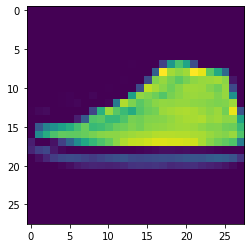

In [22]:
import matplotlib.pyplot as plt
plt.imshow(image_data)
plt.show()

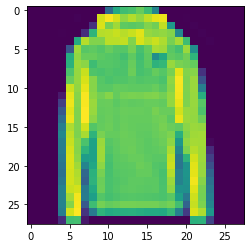

In [23]:
plt.imshow(cv2.imread("fashion_mnist_images/train/4/0002.png", cv2.IMREAD_UNCHANGED))
plt.show()

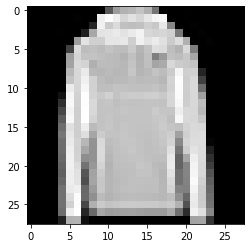

In [24]:
plt.imshow(cv2.imread("fashion_mnist_images/train/4/0002.png", cv2.IMREAD_UNCHANGED), cmap="gray")
plt.show()

## Loading Data

In [5]:
# creating a function to load the datasets for test and train
def mnist_data(dataset):
    
    # getting the labels from the dataset folder
    labels = os.listdir(f"fashion_mnist_images/{dataset}")

    X = []
    y = []
    
    # iterating over the labels 
    for label in labels:
        # iterating over the images and loading the images 
        for file in os.listdir(os.path.join("fashion_mnist_images", dataset, label)):
            image = cv2.imread(os.path.join(f"fashion_mnist_images/{dataset}", label, file), cv2.IMREAD_UNCHANGED)
            
            # storing the images and the labels
            X.append(image)
            y.append(label)
    
    return X, y

# creating a function to call the mnist_data function to get the train and test data at once
def create_data_mnist():
    
    X, y = mnist_data("train")
    X_test, y_test = mnist_data("train")
    
    return X, y, X_test, y_test



In [ ]:
X, y, X_test, y_test = create_data_mnist()

## Data Preprocessing

In [27]:
import numpy as np

# changing the values to numpy array
X = np.array(X)
y = np.array(y).astype('uint8')
X_test = np.array(X_test)
y_test = np.array(y_test).astype('uint8')

# changing the datatype to float32 and normalizing the 0-255 range values to 0,1 or -1,1
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

In [28]:
# checking the range of the images matrix values
print(X.min(), X.max())
print(X_test.min(), X_test.max())

-1.0 1.0
-1.0 1.0


In [29]:
print(X.shape)
print(X_test.shape)

(60000, 28, 28)
(60000, 28, 28)


In [30]:
# Example
example = np.array([[1,2], [3,4]])
flattened = example.reshape(-1)

print(example)
print(flattened)

[[1 2]
 [3 4]]
[1 2 3 4]


In [31]:
# changing the shapes of the 28, 28 matrix
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X.shape[0], -1)

X.shape, X_test.shape

((60000, 784), (60000, 784))

## Data Shuffling

In [32]:
keys = np.array(range(X.shape[0]))
print(keys)

[    0     1     2 ... 59997 59998 59999]


In [33]:
np.random.shuffle(keys)
print(keys)

[ 3048 19563 58303 ... 42613 43567  2732]


In [34]:
X = X[keys]
y = y[keys]

In [35]:
y[:10]

array([0, 3, 9, 1, 6, 5, 3, 9, 0, 4], dtype=uint8)

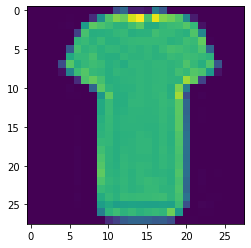

label : 3


In [38]:
plt.imshow(X[1].reshape(28,28))
plt.show()

print("label :", y[1])

## Batching

In [39]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from nnfs.datasets import sine_data

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                bias_regularizer_l1=0,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
        self.weight_regularizer_l1= weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1
        
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # getting the output with (mx +b)
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        if self.weight_regularizer_l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dl1
            
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
            
        if self.bias_regularizer_l1 >0:
            dl1 = np.ones_like(self.biases)
            dl1[self.biases < 0] = -1
            self.biases += self.bias_regularizer_l1 * dl1
            
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
#---------------------------------------------------------------------

class Layer_Dropout:
    
    def __init__(self, rate):
        self.rate = 1- rate
        
        
    def forward(self, inputs, training):
        self.intputs = inputs
        
        if not training:
            self.output = inputs.copy()
            return
        
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        
        self.output = inputs * self.binary_mask
        
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask
        
class Layer_Input:
    
    # forward pass
    def forward(self, inputs, training):
        self.output = inputs
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs, training):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
    def predictions(self, outputs):
        return outputs
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs, training):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)
                
#---------------------------------------------------------------------
                
class Activation_Linear:
    
    # forward pass
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = inputs
        
    # backward pass
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        
    def predictions(self, outputs):
        return outputs

#---------------------------------------------------------------------
    
class Activation_Sigmoid:
    
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))
        
    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output
        
    def predictions(self, outputs):
        return (outputs > 0.5) * 1

#---------------------------------------------------------------------

        
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1

#---------------------------------------------------------------------
                
class Loss:
    
    def regularization_loss(self):
        
        regularization_loss = 0
        
        #------------------L1 Regularization------------------------

        
        for layer in self.trainable_layers:
            
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

            #------------------L2 Regularization------------------------

            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

            if layer.bias_regularizer_l2 > 0 :
                regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss
    
    # set / remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
        
        
    def calculate(self, output, y, *, include_regularization= False):
        
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)
        
        
        if not include_regularization:
            return data_loss
        
        return data_loss, self.regularization_loss()
    
    def calculate_accumulated(self, *, include_regularization=False):
        
        data_loss = self.accumulated_sum / self.accumulated_count
        
        if not include_regularization:
            return data_loss
        
        return data_loss, self.regularization_loss()
    
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0
    
    
#---------------------------------------------------------------------
    
class Loss_MeanSquaredError(Loss):
    
    # forward pass
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
        
        return sample_losses
    
    # backward pass
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        # gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples

#---------------------------------------------------------------------
        
class Loss_MeanAbsoluteError(Loss):
    
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)
        
        return sample_losses
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        self.dinputs = np.sign(y_true - dvalues)/ outputs
        
        self.dinputs = self.dinputs / samples
         
#---------------------------------------------------------------------

class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
            
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    
    def calculate(self, predictions, y):
        
        comparisons = self.compare(predictions, y)
        
        accuracy = np.mean(comparisons)
        
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)
        
        return accuracy
    
    def calculate_accumulated(self):
        
        accuracy = self.accumulated_sum / self.accumulated_count
        
        return accuracy
    
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0
    
#---------------------------------------------------------------------

class Accuracy_Regression(Accuracy):
    
    def __init__(self):
        self.precision = None
        
    def init(self, y, reinit= False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250
            
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision
        

        
class Accuracy_Categorical(Accuracy):
    
    def init(self, y):
        pass
    
    def compare(self, predictions, y):
        if len(y.shape) ==2:
            y = np.argmax(y, axis=1)
            
            
        return predictions == y
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
#         # checking if the values are one-hot-encoded
#         if len(y_true.shape) ==2:
#             y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    


#---------------------------------------------------------------------

class Loss_BinaryCrossentropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1-y_true) * np.log(1- y_pred_clipped))
        
        sample_losses = np.mean(sample_losses, axis = -1)
        
        return sample_losses
    
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)
        
        self.dinputs = -(y_true / clipped_dvalues - (1-y_true) / (1-clipped_dvalues))/ outputs
        
        self.dinputs = self.dinputs / samples



    

In [44]:
class Model:
    
    def __init__(self):
        # creating a list of network objects
        self.layers = []
        self.softmax_classifier_output = None
        
    # adding layers to the model
    def add(self, layer):
        self.layers.append(layer)
        
    # set loss and optimizer
    def set(self, * , loss, optimizer, accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy = accuracy
        
    # Train the model
    def train(self, X, y, *, epochs=1, batch_size=None, print_every=1, validation_data = None):
        
        self.accuracy.init(y)
        
        train_steps = 1
        
        if validation_data :
            validation_steps =1
            
            X_val, y_val = validation_data
            
        
        if batch_size is not None:
            
            train_steps = len(X) // batch_size
            
            if train_steps * batch_size < len(X):
                train_steps +=1
                
            if validation_data is not None:
                validation_steps = len(X_val) // batch_size
                
                if validation_steps * batch_size < len(X_val):
                    validation_steps +=1
        
        
        for epoch in range(1, epochs+1):
            
            print("Epoch :" , epoch)
            
            # reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()
            
            for step in range(train_steps):
                
                # if batch is not set using the full dataset 
                if batch_size is None:
                    batch_X = X
                    batch_y = y
                
                # otherwise slice the dataset into batches
                else:
                    batch_X = X[step * batch_size:(step+1) * batch_size]
                    batch_y = y[step * batch_size:(step+1) * batch_size]
            
                output = self.forward(batch_X, training=True)

                data_loss, regularization_loss = self.loss.calculate(output, batch_y, include_regularization=True)

                loss = data_loss + regularization_loss

                predictions = self.output_layer_activation.predictions(output)

                accuracy = self.accuracy.calculate(predictions, batch_y)

                self.backward(output, batch_y)

                self.optimizer.pre_update_parameters()

                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)

                self.optimizer.post_update_parameters()

                if not step % print_every or step == train_steps - 1:
                    print(f"step: {step}, accuracy: {accuracy}, loss: {loss}, data_loss: {data_loss}, lr: {self.optimizer.current_learning_rate}")
                    
                    
        epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(include_regularization = True)
        
        epoch_loss = epoch_data_loss + epoch_regularization_loss
        epoch_accuracy = self.accuracy.calculate_accumulated()
        
        
        print(f"Training, acc: {epoch_accuracy}, loss: {epoch_loss}, data_loss: {epoch_data_loss}, lr: {self.optimizer.current_learning_rate} ")
        
        if validation_data is not None:
            
            self.evaluate(*validation_data, batch_size = batch_size)

    # finalize the model
    def finalize(self):
        
        #create and set the input layer
        self.input_layer = Layer_Input()
        
        # count all objects
        layer_count = len(self.layers)
        
        # initializing a list to store trainable layers
        self.trainable_layers = []
        
        for i in range(layer_count):
            
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]
                
            elif i < layer_count -1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]
                
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]
                
            # checking if the layer has an attribute weights
            # then adding it to the trainable layers list
            if hasattr(self.layers[i], "weights"):
                self.trainable_layers.append(self.layers[i])
                
                
            self.loss.remember_trainable_layers(self.trainable_layers)
            
        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(self.loss, Loss_CategoricalCrossEntropy):
                self.softmax_classifier_output =  Activation_Softmax_Loss_CategoricalCrossEntropy()
            
                
                
    # forward method || performs forward pass
    def forward(self, X, training):
        
        # calling the forward method on the input layer with X data
        # this will ensure the next layer or technically the first layer
        # gets the data it needs from the previous layer
        self.input_layer.forward(X, training)
        
        # looping over the layers and passing the previous layer output to each layer
        for layer in self.layers:
            layer.forward(layer.prev.output, training)
            
        # returning the latest layer that is the last activation function output
        return layer.output
    
    
    # performs backward pass
    def backward(self, output, y):
        
        self.loss.backward(output, y)
        
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)
            
            
    # evaluate the model using passed in dataset
    def evaluate(self, X_val, y_val, *, batch_size=None):
        
        validation_steps = 1
        
        if batch_size:
            
            validation_steps = len(X_val) // batch_size
            
            if validation_steps * batch_size < len(X_val):
                validation_steps +=1
        
        self.loss.new_pass()
        self.accuracy.new_pass()

        for step in range(validation_steps):

            if not batch_size:
                batch_X = X_val
                batch_y = y_val

            else:
                batch_X = X_val[step * batch_size:(step+1)* batch_size]
                batch_y = y_val[step * batch_size:(step+1)* batch_size]

        output = self.forward(batch_X,training= False)

        loss = self.loss.calculate(output, batch_y)

        predictions = self.output_layer_activation.predictions(output)

        self.accuracy.calculate(predictions, batch_y)

        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()

        print(f"validation || acc : {validation_accuracy} , loss : {validation_loss}")



In [45]:
model = Model()

model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_Relu())
model.add(Layer_Dense(128,128))
model.add(Activation_Relu())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(loss=Loss_CategoricalCrossEntropy(), optimizer= Optimizer_Adam(decay=1e-4), accuracy= Accuracy_Categorical())

model.finalize()

model.train(X,y, validation_data=(X_test, y_test), epochs=10,  batch_size=128, print_every=100)

model.evaluate(X_test, y_test)

Epoch : 1
step: 0, accuracy: 0.109375, loss: 2.302527904510498, data_loss: 2.302527904510498, lr: 0.001
step: 100, accuracy: 0.7421875, loss: 0.6272779107093811, data_loss: 0.6272779107093811, lr: 0.0009900990099009901
step: 200, accuracy: 0.8125, loss: 0.45901572704315186, data_loss: 0.45901572704315186, lr: 0.000980392156862745
step: 300, accuracy: 0.8203125, loss: 0.5406885147094727, data_loss: 0.5406885147094727, lr: 0.0009708737864077671
step: 400, accuracy: 0.828125, loss: 0.44902029633522034, data_loss: 0.44902029633522034, lr: 0.0009615384615384615
step: 468, accuracy: 0.875, loss: 0.32379546761512756, data_loss: 0.32379546761512756, lr: 0.0009552923194497518
Epoch : 2
step: 0, accuracy: 0.8515625, loss: 0.397887647151947, data_loss: 0.397887647151947, lr: 0.0009552010698251983
step: 100, accuracy: 0.8203125, loss: 0.47011977434158325, data_loss: 0.47011977434158325, lr: 0.0009461633077869241
step: 200, accuracy: 0.8828125, loss: 0.3234570026397705, data_loss: 0.323457002639770

# Saving and Loading Models and their Parameters

In [17]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from nnfs.datasets import sine_data

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                bias_regularizer_l1=0,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
        self.weight_regularizer_l1= weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1
        
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # getting the output with (mx +b)
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        if self.weight_regularizer_l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dl1
            
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
            
        if self.bias_regularizer_l1 >0:
            dl1 = np.ones_like(self.biases)
            dl1[self.biases < 0] = -1
            self.biases += self.bias_regularizer_l1 * dl1
            
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
    def get_parameters(self):
        return self.weights, self.biases
    
    def set_parameters(self, weights, biases):
        self.weights = weights
        self.biases = biases
        
#---------------------------------------------------------------------

class Layer_Dropout:
    
    def __init__(self, rate):
        self.rate = 1- rate
        
        
    def forward(self, inputs, training):
        self.intputs = inputs
        
        if not training:
            self.output = inputs.copy()
            return
        
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        
        self.output = inputs * self.binary_mask
        
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask
        
class Layer_Input:
    
    # forward pass
    def forward(self, inputs, training):
        self.output = inputs
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs, training):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
    def predictions(self, outputs):
        return outputs
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs, training):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)
                
#---------------------------------------------------------------------
                
class Activation_Linear:
    
    # forward pass
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = inputs
        
    # backward pass
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        
    def predictions(self, outputs):
        return outputs

#---------------------------------------------------------------------
    
class Activation_Sigmoid:
    
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))
        
    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output
        
    def predictions(self, outputs):
        return (outputs > 0.5) * 1

#---------------------------------------------------------------------

        
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1

#---------------------------------------------------------------------
                
class Loss:
    
    def regularization_loss(self):
        
        regularization_loss = 0
        
        #------------------L1 Regularization------------------------

        
        for layer in self.trainable_layers:
            
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

            #------------------L2 Regularization------------------------

            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

            if layer.bias_regularizer_l2 > 0 :
                regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss
    
    # set / remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
        
        
    def calculate(self, output, y, *, include_regularization= False):
        
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)
        
        
        if not include_regularization:
            return data_loss
        
        return data_loss, self.regularization_loss()
    
    def calculate_accumulated(self, *, include_regularization=False):
        
        data_loss = self.accumulated_sum / self.accumulated_count
        
        if not include_regularization:
            return data_loss
        
        return data_loss, self.regularization_loss()
    
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0
    
    
#---------------------------------------------------------------------
    
class Loss_MeanSquaredError(Loss):
    
    # forward pass
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
        
        return sample_losses
    
    # backward pass
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        # gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples

#---------------------------------------------------------------------
        
class Loss_MeanAbsoluteError(Loss):
    
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)
        
        return sample_losses
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        self.dinputs = np.sign(y_true - dvalues)/ outputs
        
        self.dinputs = self.dinputs / samples
         
#---------------------------------------------------------------------

class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
            
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    
    def calculate(self, predictions, y):
        
        comparisons = self.compare(predictions, y)
        
        accuracy = np.mean(comparisons)
        
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)
        
        return accuracy
    
    def calculate_accumulated(self):
        
        accuracy = self.accumulated_sum / self.accumulated_count
        
        return accuracy
    
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0
    
#---------------------------------------------------------------------

class Accuracy_Regression(Accuracy):
    
    def __init__(self):
        self.precision = None
        
    def init(self, y, reinit= False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250
            
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision
        

        
class Accuracy_Categorical(Accuracy):
    
    def init(self, y):
        pass
    
    def compare(self, predictions, y):
        if len(y.shape) ==2:
            y = np.argmax(y, axis=1)
            
            
        return predictions == y
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
#         # checking if the values are one-hot-encoded
#         if len(y_true.shape) ==2:
#             y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    


#---------------------------------------------------------------------

class Loss_BinaryCrossentropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1-y_true) * np.log(1- y_pred_clipped))
        
        sample_losses = np.mean(sample_losses, axis = -1)
        
        return sample_losses
    
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)
        
        self.dinputs = -(y_true / clipped_dvalues - (1-y_true) / (1-clipped_dvalues))/ outputs
        
        self.dinputs = self.dinputs / samples



    

In [80]:
import pickle

class Model:
    
    def __init__(self):
        # creating a list of network objects
        self.layers = []
        self.softmax_classifier_output = None
        
    # adding layers to the model
    def add(self, layer):
        self.layers.append(layer)
        
    # set loss and optimizer
    def set(self, * , loss=None, optimizer=None, accuracy=None):
        if loss:
            self.loss = loss
        if optimizer:
            self.optimizer = optimizer
        if accuracy:
            self.accuracy = accuracy
        
    # Train the model
    def train(self, X, y, *, epochs=1, batch_size=None, print_every=1, validation_data = None):
        
        self.accuracy.init(y)
        
        train_steps = 1
        
        if validation_data :
            validation_steps =1
            
            X_val, y_val = validation_data
            
        
        if batch_size is not None:
            
            train_steps = len(X) // batch_size
            
            if train_steps * batch_size < len(X):
                train_steps +=1
                
            if validation_data is not None:
                validation_steps = len(X_val) // batch_size
                
                if validation_steps * batch_size < len(X_val):
                    validation_steps +=1
        
        
        for epoch in range(1, epochs+1):
            
            print("Epoch :" , epoch)
            
            # reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()
            
            for step in range(train_steps):
                
                # if batch is not set using the full dataset 
                if batch_size is None:
                    batch_X = X
                    batch_y = y
                
                # otherwise slice the dataset into batches
                else:
                    batch_X = X[step * batch_size:(step+1) * batch_size]
                    batch_y = y[step * batch_size:(step+1) * batch_size]
            
                output = self.forward(batch_X, training=True)

                data_loss, regularization_loss = self.loss.calculate(output, batch_y, include_regularization=True)

                loss = data_loss + regularization_loss

                predictions = self.output_layer_activation.predictions(output)

                accuracy = self.accuracy.calculate(predictions, batch_y)

                self.backward(output, batch_y)
                
                self.optimizer.pre_update_parameters()

                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)

                self.optimizer.post_update_parameters()

                if not step % print_every or step == train_steps - 1:
                    print(f"step: {step}, accuracy: {accuracy}, loss: {loss}, data_loss: {data_loss}, lr: {self.optimizer.current_learning_rate}")
                    
                    
        epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(include_regularization = True)
        
        epoch_loss = epoch_data_loss + epoch_regularization_loss
        epoch_accuracy = self.accuracy.calculate_accumulated()
        
        
        print(f"Training, acc: {epoch_accuracy}, loss: {epoch_loss}, data_loss: {epoch_data_loss}, lr: {self.optimizer.current_learning_rate} ")
        
        if validation_data is not None:
            
            self.evaluate(*validation_data, batch_size = batch_size)

    # finalize the model
    def finalize(self):
        
        #create and set the input layer
        self.input_layer = Layer_Input()
        
        # count all objects
        layer_count = len(self.layers)
        
        # initializing a list to store trainable layers
        self.trainable_layers = []
        
        for i in range(layer_count):
            
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]
                
            elif i < layer_count -1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]
                
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]
                
            # checking if the layer has an attribute weights
            # then adding it to the trainable layers list
            if hasattr(self.layers[i], "weights"):
                self.trainable_layers.append(self.layers[i])
                
            if self.loss is not None:   
                self.loss.remember_trainable_layers(self.trainable_layers)
            
        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(self.loss, Loss_CategoricalCrossEntropy):
                self.softmax_classifier_output =  Activation_Softmax_Loss_CategoricalCrossEntropy()
            
                
                
    # forward method || performs forward pass
    def forward(self, X, training):
        
        # calling the forward method on the input layer with X data
        # this will ensure the next layer or technically the first layer
        # gets the data it needs from the previous layer
        self.input_layer.forward(X, training)
        
        # looping over the layers and passing the previous layer output to each layer
        for layer in self.layers:
            layer.forward(layer.prev.output, training)
            
        # returning the latest layer that is the last activation function output
        return layer.output
    
    
    # performs backward pass
    def backward(self, output, y):
        
        self.loss.backward(output, y)
        
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)
            
            
    # evaluate the model using passed in dataset
    def evaluate(self, X_val, y_val, *, batch_size=None):
        
        validation_steps = 1
        
        if batch_size:
            
            validation_steps = len(X_val) // batch_size
            
            if validation_steps * batch_size < len(X_val):
                validation_steps +=1
        
        self.loss.new_pass()
        self.accuracy.new_pass()

        for step in range(validation_steps):

            if not batch_size:
                batch_X = X_val
                batch_y = y_val

            else:
                batch_X = X_val[step * batch_size:(step+1)* batch_size]
                batch_y = y_val[step * batch_size:(step+1)* batch_size]

        output = self.forward(batch_X,training= False)

        loss = self.loss.calculate(output, batch_y)

        predictions = self.output_layer_activation.predictions(output)

        self.accuracy.calculate(predictions, batch_y)

        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()

        print(f"validation || acc : {validation_accuracy} , loss : {validation_loss}")

        
    # retrieves and returns the parameters of trainable layers
    def get_parameters(self):
        
        # list of parameters
        parameters = []
        
        # looping over the trainable layers or the dense layers and storing
        # their parameters
        for layer in self.trainable_layers:
            parameters.append(layer.get_parameters())
            
        return parameters

    def set_parameters(self, parameters):
        for parameter_set, layer in zip(parameters, self.trainable_layers):
            layer.set_parameters(*parameter_set)
            
    def save_parameters(self, path):
        
        with open(path, 'wb') as f:
            pickle.dump(self.get_parameters(), f)
            
            
    def load_patameters(self, path):
        with open(path, 'rb') as f:
            self.set_parameters(pickle.load(f))
    

In [66]:
model = Model()

model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_Relu())
model.add(Layer_Dense(128,128))
model.add(Activation_Relu())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(loss=Loss_CategoricalCrossEntropy(), optimizer= Optimizer_Adam(decay=1e-4), accuracy= Accuracy_Categorical())

model.finalize()

model.train(X,y, validation_data=(X_test, y_test), epochs=10,  batch_size=128, print_every=100)

model.evaluate(X_test, y_test)

Epoch : 1
step: 0, accuracy: 0.09375, loss: 2.3024964332580566, data_loss: 2.3024964332580566, lr: 0.001
step: 100, accuracy: 0.75, loss: 0.6230136156082153, data_loss: 0.6230136156082153, lr: 0.0009900990099009901
step: 200, accuracy: 0.8203125, loss: 0.4880841374397278, data_loss: 0.4880841374397278, lr: 0.000980392156862745
step: 300, accuracy: 0.7890625, loss: 0.5615738034248352, data_loss: 0.5615738034248352, lr: 0.0009708737864077671
step: 400, accuracy: 0.8125, loss: 0.4772418737411499, data_loss: 0.4772418737411499, lr: 0.0009615384615384615
step: 468, accuracy: 0.8541666666666666, loss: 0.3476001024246216, data_loss: 0.3476001024246216, lr: 0.0009552923194497518
Epoch : 2
step: 0, accuracy: 0.8515625, loss: 0.41050422191619873, data_loss: 0.41050422191619873, lr: 0.0009552010698251983
step: 100, accuracy: 0.796875, loss: 0.48743391036987305, data_loss: 0.48743391036987305, lr: 0.0009461633077869241
step: 200, accuracy: 0.8671875, loss: 0.3416329622268677, data_loss: 0.34163296

In [79]:
parameters  = model.get_parameters()
print(parameters)

[(array([[-0.03946078,  0.03837414, -0.02135864, ...,  0.01119648,
        -0.00555523,  0.02385409],
       [-0.04027164,  0.03780807, -0.01047406, ...,  0.03286309,
         0.00940319,  0.00955247],
       [-0.04077249,  0.02484431, -0.02417967, ...,  0.02751668,
        -0.00067079,  0.0169488 ],
       ...,
       [-0.05137451,  0.02041244,  0.02438609, ...,  0.04216436,
         0.04135995,  0.01238294],
       [-0.04309473,  0.02510377,  0.02106452, ...,  0.01386279,
         0.03239899,  0.01778853],
       [-0.04167083,  0.0339663 , -0.00555694, ...,  0.01847898,
         0.01010656,  0.01332747]], dtype=float32), array([[ 0.03966366, -0.04056697,  0.01498523, -0.0360437 , -0.01053787,
         0.00547004, -0.01001751,  0.01064655, -0.00336151,  0.01958312,
        -0.01899779,  0.04203601,  0.06543857, -0.01419953, -0.00294141,
        -0.00222431, -0.03363403, -0.00387943, -0.02602347,  0.02975911,
         0.00440716,  0.03404903, -0.01728227,  0.02588595, -0.02147042,
    

In [73]:
model = Model()

model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_Relu())
model.add(Layer_Dense(128,128))
model.add(Activation_Relu())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(loss=Loss_CategoricalCrossEntropy(), accuracy= Accuracy_Categorical())

model.finalize()

# Setting the parameters from the previous run
model.set_parameters(parameters)

# don't need to train the model again as we have prebuilt parameters
# evaluating the model 
model.evaluate(X_test, y_test)

validation || acc : 0.91055 , loss : 0.24055826822916668


# Save Model

In [81]:
import pickle
import copy

class Model:
    
    def __init__(self):
        # creating a list of network objects
        self.layers = []
        self.softmax_classifier_output = None
        
    # adding layers to the model
    def add(self, layer):
        self.layers.append(layer)
        
    # set loss and optimizer
    def set(self, * , loss=None, optimizer=None, accuracy=None):
        if loss:
            self.loss = loss
        if optimizer:
            self.optimizer = optimizer
        if accuracy:
            self.accuracy = accuracy
        
    # Train the model
    def train(self, X, y, *, epochs=1, batch_size=None, print_every=1, validation_data = None):
        
        self.accuracy.init(y)
        
        train_steps = 1
        
        if validation_data :
            validation_steps =1
            
            X_val, y_val = validation_data
            
        
        if batch_size is not None:
            
            train_steps = len(X) // batch_size
            
            if train_steps * batch_size < len(X):
                train_steps +=1
                
            if validation_data is not None:
                validation_steps = len(X_val) // batch_size
                
                if validation_steps * batch_size < len(X_val):
                    validation_steps +=1
        
        
        for epoch in range(1, epochs+1):
            
            print("Epoch :" , epoch)
            
            # reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()
            
            for step in range(train_steps):
                
                # if batch is not set using the full dataset 
                if batch_size is None:
                    batch_X = X
                    batch_y = y
                
                # otherwise slice the dataset into batches
                else:
                    batch_X = X[step * batch_size:(step+1) * batch_size]
                    batch_y = y[step * batch_size:(step+1) * batch_size]
            
                output = self.forward(batch_X, training=True)

                data_loss, regularization_loss = self.loss.calculate(output, batch_y, include_regularization=True)

                loss = data_loss + regularization_loss

                predictions = self.output_layer_activation.predictions(output)

                accuracy = self.accuracy.calculate(predictions, batch_y)

                self.backward(output, batch_y)
                
                self.optimizer.pre_update_parameters()

                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)

                self.optimizer.post_update_parameters()

                if not step % print_every or step == train_steps - 1:
                    print(f"step: {step}, accuracy: {accuracy}, loss: {loss}, data_loss: {data_loss}, lr: {self.optimizer.current_learning_rate}")
                    
                    
        epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(include_regularization = True)
        
        epoch_loss = epoch_data_loss + epoch_regularization_loss
        epoch_accuracy = self.accuracy.calculate_accumulated()
        
        
        print(f"Training, acc: {epoch_accuracy}, loss: {epoch_loss}, data_loss: {epoch_data_loss}, lr: {self.optimizer.current_learning_rate} ")
        
        if validation_data is not None:
            
            self.evaluate(*validation_data, batch_size = batch_size)

    # finalize the model
    def finalize(self):
        
        #create and set the input layer
        self.input_layer = Layer_Input()
        
        # count all objects
        layer_count = len(self.layers)
        
        # initializing a list to store trainable layers
        self.trainable_layers = []
        
        for i in range(layer_count):
            
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]
                
            elif i < layer_count -1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]
                
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]
                
            # checking if the layer has an attribute weights
            # then adding it to the trainable layers list
            if hasattr(self.layers[i], "weights"):
                self.trainable_layers.append(self.layers[i])
                
            if self.loss is not None:   
                self.loss.remember_trainable_layers(self.trainable_layers)
            
        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(self.loss, Loss_CategoricalCrossEntropy):
                self.softmax_classifier_output =  Activation_Softmax_Loss_CategoricalCrossEntropy()
            
                
                
    # forward method || performs forward pass
    def forward(self, X, training):
        
        # calling the forward method on the input layer with X data
        # this will ensure the next layer or technically the first layer
        # gets the data it needs from the previous layer
        self.input_layer.forward(X, training)
        
        # looping over the layers and passing the previous layer output to each layer
        for layer in self.layers:
            layer.forward(layer.prev.output, training)
            
        # returning the latest layer that is the last activation function output
        return layer.output
    
    
    # performs backward pass
    def backward(self, output, y):
        
        self.loss.backward(output, y)
        
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)
            
            
    # evaluate the model using passed in dataset
    def evaluate(self, X_val, y_val, *, batch_size=None):
        
        validation_steps = 1
        
        if batch_size:
            
            validation_steps = len(X_val) // batch_size
            
            if validation_steps * batch_size < len(X_val):
                validation_steps +=1
        
        self.loss.new_pass()
        self.accuracy.new_pass()

        for step in range(validation_steps):

            if not batch_size:
                batch_X = X_val
                batch_y = y_val

            else:
                batch_X = X_val[step * batch_size:(step+1)* batch_size]
                batch_y = y_val[step * batch_size:(step+1)* batch_size]

        output = self.forward(batch_X,training= False)

        loss = self.loss.calculate(output, batch_y)

        predictions = self.output_layer_activation.predictions(output)

        self.accuracy.calculate(predictions, batch_y)

        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()

        print(f"validation || acc : {validation_accuracy} , loss : {validation_loss}")

        
    # retrieves and returns the parameters of trainable layers
    def get_parameters(self):
        
        # list of parameters
        parameters = []
        
        # looping over the trainable layers or the dense layers and storing
        # their parameters
        for layer in self.trainable_layers:
            parameters.append(layer.get_parameters())
            
        return parameters

    def set_parameters(self, parameters):
        for parameter_set, layer in zip(parameters, self.trainable_layers):
            layer.set_parameters(*parameter_set)
            
    def save_parameters(self, path):
        
        with open(path, 'wb') as f:
            pickle.dump(self.get_parameters(), f)
            
            
    def load_patameters(self, path):
        with open(path, 'rb') as f:
            self.set_parameters(pickle.load(f))
    
    def save(self, path):
        
        # making a deep copy of the current model instance
        model = copy.deepcopy(self)
        
        model.loss.new_pass()
        model.accuracy.new_pass()
        
        model.input_layer.__dict__.pop('output', None)
        model.loss.__dict__.pop('dinputs', None)
        
        for layer in model.layers:
            for property in ['inputs', 'output', 'dinputs', 'dweights', 'dbiases']:
                
                layer.__dict__.pop(property, None)
        
        with open(path, 'wb') as f:
            pickle.dump(model, f)
    
    @staticmethod
    def load(path):
        
        with open(path, 'rb') as f:
            model = pickle.load(f)
            
        return model
        

In [83]:
model = Model()

model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_Relu())
model.add(Layer_Dense(128,128))
model.add(Activation_Relu())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(loss=Loss_CategoricalCrossEntropy(), optimizer= Optimizer_Adam(decay=1e-4), accuracy= Accuracy_Categorical())

model.finalize()

model.train(X,y, validation_data=(X_test, y_test), epochs=10,  batch_size=128, print_every=100)

model.evaluate(X_test, y_test)

model.save("fashion_mnist.model")

print("Saved model..")

Epoch : 1
step: 0, accuracy: 0.1875, loss: 2.3022680282592773, data_loss: 2.3022680282592773, lr: 0.001
step: 100, accuracy: 0.734375, loss: 0.630014181137085, data_loss: 0.630014181137085, lr: 0.0009900990099009901
step: 200, accuracy: 0.8203125, loss: 0.45043158531188965, data_loss: 0.45043158531188965, lr: 0.000980392156862745
step: 300, accuracy: 0.796875, loss: 0.5518173575401306, data_loss: 0.5518173575401306, lr: 0.0009708737864077671
step: 400, accuracy: 0.828125, loss: 0.44665712118148804, data_loss: 0.44665712118148804, lr: 0.0009615384615384615
step: 468, accuracy: 0.875, loss: 0.3246632516384125, data_loss: 0.3246632516384125, lr: 0.0009552923194497518
Epoch : 2
step: 0, accuracy: 0.8359375, loss: 0.3953976333141327, data_loss: 0.3953976333141327, lr: 0.0009552010698251983
step: 100, accuracy: 0.8125, loss: 0.4560910761356354, data_loss: 0.4560910761356354, lr: 0.0009461633077869241
step: 200, accuracy: 0.8671875, loss: 0.31984949111938477, data_loss: 0.31984949111938477, l

In [84]:
model2 = Model.load("fashion_mnist.model")

model.evaluate(X_test, y_test)

validation || acc : 0.9080666666666667 , loss : 0.245620263671875


# Prediction 

In [21]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from nnfs.datasets import sine_data

nnfs.init()

class Layer_Dense:
    
    # getting the number of inputs and neurons
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                bias_regularizer_l1=0,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
        
        #initializing random weights in range 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
        self.weight_regularizer_l1= weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1
        
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    # getting the output with (mx +b)
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # backward pass which takes the derivative values from the next function 
    def backward(self, dvalues):
        # getting the partial derivative with the inputs
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        if self.weight_regularizer_l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dl1
            
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
            
        if self.bias_regularizer_l1 >0:
            dl1 = np.ones_like(self.biases)
            dl1[self.biases < 0] = -1
            self.biases += self.bias_regularizer_l1 * dl1
            
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
        
        
        self.dinputs = np.dot(dvalues, self.weights.T)
        
    def get_parameters(self):
        return self.weights, self.biases
    
    def set_parameters(self, weights, biases):
        self.weights = weights
        self.biases = biases
        
#---------------------------------------------------------------------

class Layer_Dropout:
    
    def __init__(self, rate):
        self.rate = 1- rate
        
        
    def forward(self, inputs, training):
        self.intputs = inputs
        
        if not training:
            self.output = inputs.copy()
            return
        
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        
        self.output = inputs * self.binary_mask
        
    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask
        
class Layer_Input:
    
    # forward pass
    def forward(self, inputs, training):
        self.output = inputs
        
#---------------------------------------------------------------------

class Activation_Relu:
    
    # The method which takes the input
    def forward(self, inputs, training):
        
        self.inputs = inputs
        # returns output with the maximum of 0 and the input value
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <=0] = 0
        
    def predictions(self, outputs):
        return outputs
        
#---------------------------------------------------------------------
        
# Creating an Activation function class
class Activation_Softmax:
    
    # The method which takes the input
    def forward(self, inputs, training):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        norm_vals = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = norm_vals
        
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
                
                single_output = single_output.reshape(-1,1)
                
                jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
                
                self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)
                
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)
                
#---------------------------------------------------------------------
                
class Activation_Linear:
    
    # forward pass
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = inputs
        
    # backward pass
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        
    def predictions(self, outputs):
        return outputs

#---------------------------------------------------------------------
    
class Activation_Sigmoid:
    
    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))
        
    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output
        
    def predictions(self, outputs):
        return (outputs > 0.5) * 1

#---------------------------------------------------------------------

        
class Optimizer_SGD:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., momentum =0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        
        # if we use momentum
        if self.momentum:
            # if the layer does not contain momentum arrays
            if not hasattr(layer, "weight_momentums"):
                # creating weight_momentums and bias_momentums arrays initialized with zero
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            # getting the weight updates with momentum - take previous factors
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            
            # getting bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:

            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates =  -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    def post_update_parameters(self):
        self.iterations +=1

#----------------------------------------------------------------------
        
class Optimizer_AdaGrad:
    
    # setting learning rate default as 1.
    def __init__(self, learning_rate = 1.0, decay=0., epsilon =1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            # creating weight_cache and bias_cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        # getting the square of the gradients
        layer.weight_cache += layer.dweights **2
        layer.bias_cache += layer.dbiases **2
        
        # calculating the result and adding it to the weights and biases
        layer.weights += - self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += - self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1
                
#----------------------------------------------------------------------


class Optimizer_Adam:
    
    def __init__(self, learning_rate = 0.001, decay=0. ,
                 epsilon=1e-7, beta_1=0.9, beta_2 = 0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
        
    def update_params(self, layer):
        # checking if layer has attribute weight_cache
        if not hasattr(layer, "weight_cache"):
            
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1- self.beta_1) * layer.dweights
        
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1- self.beta_1) * layer.dbiases
        
        
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights **2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases **2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations +1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations +1))
        
        
        layer.weights += - self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected)+ self.epsilon)
        layer.biases += - self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected)+ self.epsilon)

        
    def post_update_parameters(self):
        self.iterations +=1

#---------------------------------------------------------------------
                
class Loss:
    
    def regularization_loss(self):
        
        regularization_loss = 0
        
        #------------------L1 Regularization------------------------

        
        for layer in self.trainable_layers:
            
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

            #------------------L2 Regularization------------------------

            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

            if layer.bias_regularizer_l2 > 0 :
                regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss
    
    # set / remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
        
        
    def calculate(self, output, y, *, include_regularization= False):
        
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)
        
        
        if not include_regularization:
            return data_loss
        
        return data_loss, self.regularization_loss()
    
    def calculate_accumulated(self, *, include_regularization=False):
        
        data_loss = self.accumulated_sum / self.accumulated_count
        
        if not include_regularization:
            return data_loss
        
        return data_loss, self.regularization_loss()
    
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0
    
    
#---------------------------------------------------------------------
    
class Loss_MeanSquaredError(Loss):
    
    # forward pass
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
        
        return sample_losses
    
    # backward pass
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        # gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples

#---------------------------------------------------------------------
        
class Loss_MeanAbsoluteError(Loss):
    
    def forward(self, y_pred, y_true):
        
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)
        
        return sample_losses
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        self.dinputs = np.sign(y_true - dvalues)/ outputs
        
        self.dinputs = self.dinputs / samples
         
#---------------------------------------------------------------------

class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_target):
        samples = len(y_pred)
        
        # clipping the values so we don't end up with inf error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        # checking if 1D array so we just need to get that index value
        if len(y_target.shape) == 1:
            correct = y_pred_clipped[range(samples), y_target]
            
        # checking if one-hot-encoded values, then multiplying and summing up
        elif len(y_target.shape) == 2:
            correct = np.sum(y_pred_clipped * y_target, axis=1)
        
        negative_log = -np.log(correct)
        
        return negative_log
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) ==1:
            y_true = np.eye(labels)[y_true]
            
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples
    
#---------------------------------------------------------------------

class Accuracy:
    
    def calculate(self, predictions, y):
        
        comparisons = self.compare(predictions, y)
        
        accuracy = np.mean(comparisons)
        
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)
        
        return accuracy
    
    def calculate_accumulated(self):
        
        accuracy = self.accumulated_sum / self.accumulated_count
        
        return accuracy
    
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0
    
#---------------------------------------------------------------------

class Accuracy_Regression(Accuracy):
    
    def __init__(self):
        self.precision = None
        
    def init(self, y, reinit= False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250
            
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision
        

        
class Accuracy_Categorical(Accuracy):
    
    def init(self, y):
        pass
    
    def compare(self, predictions, y):
        if len(y.shape) ==2:
            y = np.argmax(y, axis=1)
            
            
        return predictions == y
        

#.......................................................................

class Activation_Softmax_Loss_CategoricalCrossEntropy():
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
#         # checking if the values are one-hot-encoded
#         if len(y_true.shape) ==2:
#             y_true = np.argmax(y_true, axis=1)
            
        
        self.dinputs = dvalues.copy()
        
        # calculate gradient
        self.dinputs[range(samples), y_true] -=1
        
        # normalizing gradient
        self.dinputs = self.dinputs / samples
    


#---------------------------------------------------------------------

class Loss_BinaryCrossentropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1-y_true) * np.log(1- y_pred_clipped))
        
        sample_losses = np.mean(sample_losses, axis = -1)
        
        return sample_losses
    
    
    def backward(self, dvalues, y_true):
        
        samples = len(dvalues)
        
        outputs = len(dvalues[0])
        
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)
        
        self.dinputs = -(y_true / clipped_dvalues - (1-y_true) / (1-clipped_dvalues))/ outputs
        
        self.dinputs = self.dinputs / samples


In [19]:
import pickle
import copy

class Model:
    
    def __init__(self):
        # creating a list of network objects
        self.layers = []
        self.softmax_classifier_output = None
        
    # adding layers to the model
    def add(self, layer):
        self.layers.append(layer)
        
    # set loss and optimizer
    def set(self, * , loss=None, optimizer=None, accuracy=None):
        if loss:
            self.loss = loss
        if optimizer:
            self.optimizer = optimizer
        if accuracy:
            self.accuracy = accuracy
        
    # Train the model
    def train(self, X, y, *, epochs=1, batch_size=None, print_every=1, validation_data = None):
        
        self.accuracy.init(y)
        
        train_steps = 1
        
        if validation_data :
            validation_steps =1
            
            X_val, y_val = validation_data
            
        
        if batch_size is not None:
            
            train_steps = len(X) // batch_size
            
            if train_steps * batch_size < len(X):
                train_steps +=1
                
            if validation_data is not None:
                validation_steps = len(X_val) // batch_size
                
                if validation_steps * batch_size < len(X_val):
                    validation_steps +=1
        
        
        for epoch in range(1, epochs+1):
            
            print("Epoch :" , epoch)
            
            # reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()
            
            for step in range(train_steps):
                
                # if batch is not set using the full dataset 
                if batch_size is None:
                    batch_X = X
                    batch_y = y
                
                # otherwise slice the dataset into batches
                else:
                    batch_X = X[step * batch_size:(step+1) * batch_size]
                    batch_y = y[step * batch_size:(step+1) * batch_size]
            
                output = self.forward(batch_X, training=True)

                data_loss, regularization_loss = self.loss.calculate(output, batch_y, include_regularization=True)

                loss = data_loss + regularization_loss

                predictions = self.output_layer_activation.predictions(output)

                accuracy = self.accuracy.calculate(predictions, batch_y)

                self.backward(output, batch_y)
                
                self.optimizer.pre_update_parameters()

                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)

                self.optimizer.post_update_parameters()

                if not step % print_every or step == train_steps - 1:
                    print(f"step: {step}, accuracy: {accuracy}, loss: {loss}, data_loss: {data_loss}, lr: {self.optimizer.current_learning_rate}")
                    
                    
        epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(include_regularization = True)
        
        epoch_loss = epoch_data_loss + epoch_regularization_loss
        epoch_accuracy = self.accuracy.calculate_accumulated()
        
        
        print(f"Training, acc: {epoch_accuracy}, loss: {epoch_loss}, data_loss: {epoch_data_loss}, lr: {self.optimizer.current_learning_rate} ")
        
        if validation_data is not None:
            
            self.evaluate(*validation_data, batch_size = batch_size)

    # finalize the model
    def finalize(self):
        
        #create and set the input layer
        self.input_layer = Layer_Input()
        
        # count all objects
        layer_count = len(self.layers)
        
        # initializing a list to store trainable layers
        self.trainable_layers = []
        
        for i in range(layer_count):
            
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]
                
            elif i < layer_count -1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]
                
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]
                
            # checking if the layer has an attribute weights
            # then adding it to the trainable layers list
            if hasattr(self.layers[i], "weights"):
                self.trainable_layers.append(self.layers[i])
                
            if self.loss is not None:   
                self.loss.remember_trainable_layers(self.trainable_layers)
            
        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(self.loss, Loss_CategoricalCrossEntropy):
                self.softmax_classifier_output =  Activation_Softmax_Loss_CategoricalCrossEntropy()
            
                
                
    # forward method || performs forward pass
    def forward(self, X, training):
        
        # calling the forward method on the input layer with X data
        # this will ensure the next layer or technically the first layer
        # gets the data it needs from the previous layer
        self.input_layer.forward(X, training)
        
        # looping over the layers and passing the previous layer output to each layer
        for layer in self.layers:
            layer.forward(layer.prev.output, training)
            
        # returning the latest layer that is the last activation function output
        return layer.output
    
    
    # performs backward pass
    def backward(self, output, y):
        
        self.loss.backward(output, y)
        
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)
            
            
    # evaluate the model using passed in dataset
    def evaluate(self, X_val, y_val, *, batch_size=None):
        
        validation_steps = 1
        
        if batch_size:
            
            validation_steps = len(X_val) // batch_size
            
            if validation_steps * batch_size < len(X_val):
                validation_steps +=1
        
        self.loss.new_pass()
        self.accuracy.new_pass()

        for step in range(validation_steps):

            if not batch_size:
                batch_X = X_val
                batch_y = y_val

            else:
                batch_X = X_val[step * batch_size:(step+1)* batch_size]
                batch_y = y_val[step * batch_size:(step+1)* batch_size]

        output = self.forward(batch_X,training= False)

        loss = self.loss.calculate(output, batch_y)

        predictions = self.output_layer_activation.predictions(output)

        self.accuracy.calculate(predictions, batch_y)

        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()

        print(f"validation || acc : {validation_accuracy} , loss : {validation_loss}")

        
    # retrieves and returns the parameters of trainable layers
    def get_parameters(self):
        
        # list of parameters
        parameters = []
        
        # looping over the trainable layers or the dense layers and storing
        # their parameters
        for layer in self.trainable_layers:
            parameters.append(layer.get_parameters())
            
        return parameters

    def set_parameters(self, parameters):
        for parameter_set, layer in zip(parameters, self.trainable_layers):
            layer.set_parameters(*parameter_set)
            
    def save_parameters(self, path):
        
        with open(path, 'wb') as f:
            pickle.dump(self.get_parameters(), f)
            
            
    def load_patameters(self, path):
        with open(path, 'rb') as f:
            self.set_parameters(pickle.load(f))
            
            
    def predict(self, X, *, batch_size=None):
        
        prediction_steps= 1
        
        if batch_size:
            prediction_steps = len(X) // batch_size
            
            if prediction_steps * batch_size < len(X):
                prediction_steps +=1
        
        output = []
        
        for step in range(prediction_steps):
            
            if batch_size is None:
                batch_X = X
            
            else:
                batch_X = X[step * batch_size:(step+1)* batch_size]
                
            batch_output = self.forward(batch_X, training = False)
            
            output.append(batch_output)
            
            
        return np.vstack(output)
        
    
    def save(self, path):
        
        # making a deep copy of the current model instance
        model = copy.deepcopy(self)
        
        model.loss.new_pass()
        model.accuracy.new_pass()
        
        model.input_layer.__dict__.pop('output', None)
        model.loss.__dict__.pop('dinputs', None)
        
        for layer in model.layers:
            for property in ['inputs', 'output', 'dinputs', 'dweights', 'dbiases']:
                
                layer.__dict__.pop(property, None)
        
        with open(path, 'wb') as f:
            pickle.dump(model, f)
    
    @staticmethod
    def load(path):
        
        with open(path, 'rb') as f:
            model = pickle.load(f)
            
        return model
        

In [10]:
import os
import cv2

X, y, X_test, y_test = create_data_mnist()

AttributeError: 'list' object has no attribute 'reshape'

In [12]:
import numpy as np

X_test = np.array(X_test)
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5)/127.5

In [23]:
model = Model.load("fashion_mnist.model")

confidence = model.predict(X_test[:5])
predictions = model.output_layer_activation.predictions(confidence)
print(predictions)

[0 0 3 0 0]
